<h1><center>Time Series Analysis with Applications in Python</center></h1>   

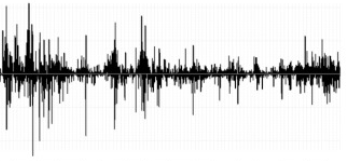

## Contents
1. [Time Series Basics](#Time_Series_Basics)
2. [Exponential Smoothing and ETS methods](#ESETS)
3. [ARIMA](#ARIMA)
4. VECTOR Autoregression
5. GARCH
6. Machine Learning Approaches

<h1><center>1. Time Series Basics<h1><center>
<a id='Time_Series_Basics'></a>
    
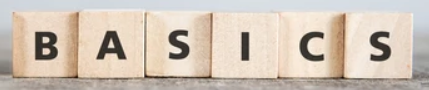


### Outline for Time Series Analysis:

* What is a time series?
* Modeling vs Predicting
* Shapes and visualizing data
* Kind of time series tasks (one-step, multi-step forecasts, classifications)
* Time series transformations (eg Box-Cox)
* Forecasting Metrics
* Financial Time Series Primer
* Price simulations in code
* Random Walks
* Naive Forecasts

### What is a time series?

* Note: Sequence data won't be discussed eg. Sequences of words (NLP) or Genomics
* Note: Irregularly spaced time series data will also not be modelled
* For the purpose of this notebook, a time series is of continous value but discrete in time


### Modeling vs. Predicting
* Predicting: Guessing a value that you do not know
    * Will user click ad, will stock price go up, where is the object in the image?
* Modeling: Gives a functional form to your time series
    * Insight into behaviour of time series
    * Why time series is mean reverting?
    * Why does time series grow unbounded?
    * Is the time series predictable?
* Times Series Analysis often refers to modelling, whereas predicting refers to forecasting

### Why do we care about shapes?
* Libraries used will make assumptions about the data shape
* Understanding shapes helps to visualize the data
* Multi-dimensional time series are a bit harder

* 1-Dimensional Time Series:
    * Ex. Daily temperature over time
    * Think of an array that goes from left to right or top to bottom

* In Pandas, DataFrames are 2D but series are 1D
    * Can think of DF as series concat together
    * Store as T x 1 Structure
* Suppose Multi Dimensional DataFrame
    * Ex. NY, London, Tokyo, Paris -> Temperature for D Citiies (#Col) and T Days (#Rows)
    * Stored in DF/Array of shape TxD

* 3D Space: Picture a Box 
    * With multiple samples N store in NxTxD

### Types of Tasks
* 1-Step Forecasts
    * Given y(1), y(2), y(3) -> Predict y(t) to y(t+1)

* Multi-Step Forecast
    * Forecast Horizon = Number of steps to forecast
    * Ex. Daily sales next week, Daily temperature
    * Useful as imagine a weather channel only showing one day ahead
    * This isn't to say 1-Step forecasts are not useful:
        * Ex Brick and Mortar shop might forecast sales of a product next month using monthly data to purchase inventory and fulfill demand

* Two ways to produce multi-step forecasts
    1. Incremental method (Can be done with any 1-Step Predictor)
    2. Multi-output forecast (Limited to certain models)
        * Ex. ARIMA can only do 1-Step forecasts not multi-output forecasts

* Incremental Multi-Step Forecasts
    * Obtain ŷ(t+1) to obtain next step in the forecast, using ŷ predictor
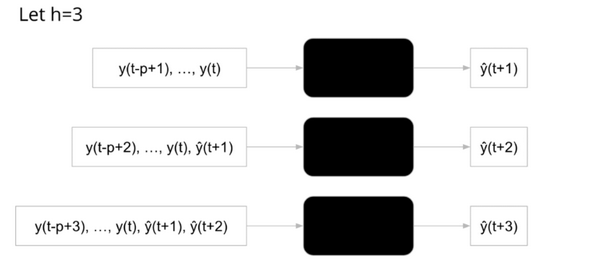

* Multi-Output Multi-Step Forecast
    *  Some ML Models can give multiple outputs at once
    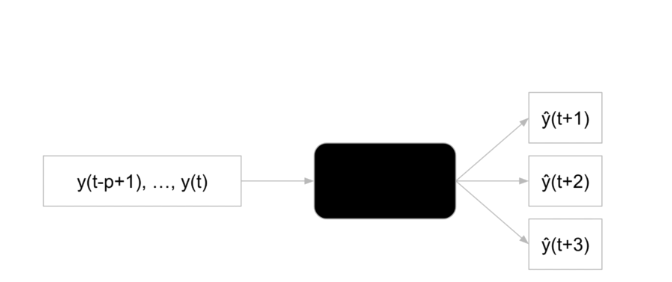

* Time Series Classification
    * Previous examples predict a number, called regression
    * What about predicting a category?
        * Ex. Neuralink reading brain signals -> hungry or tired
        * Smartphone accelerometer -> Walking, sleeping etc

### Time Series Transformations
* Useful to transform your data (eg. Standardization, min-max scaling)
* For Time Series:
    * Power Transform
    * Log Transform
    * Box-Cox Transform

 * Power Transform
     * Raise all data points to a power Eg. y = 1/2 (Square Rooting Data)
     * y'(t) = y(t)^y
     * Why is this useful?
         * Suppose data grows quadratically, by using y=1/2, you convert to it to a linear trend which is easier to model
     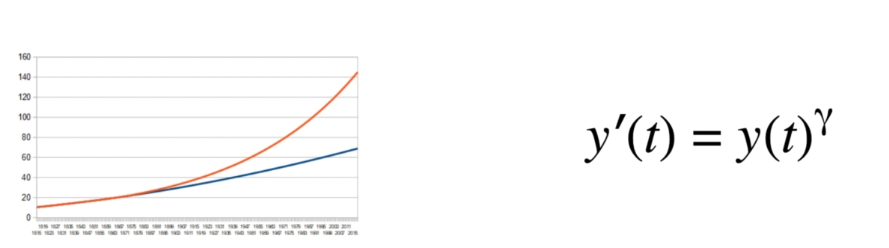

* Log Transform
    * "Squashes" Data into a similar range
    * Common applications in Finance eg Log Returns, Prices
    * Only accepts positive values, which can be an issue
        * For non-negative data, common to +1 before taking the log
        * More precisely, calculate set minimum for dataset, add more than min value
        * $ y'(t) = log y(t) $ or $ log(y(t)+1) $
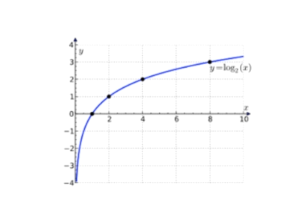

* Box- Cox Transform
    * Unfies the power and log transforms
    * λ is chosen automatically by boxcox() function in Scipy
        * Scipy choses optimal value of lambda
    * $ y'(t) = y(t)^λ -1/y $ if lambda ≠ 0
    * $ y'(t) = log y(t) $ if lambda = 0
        
    * Common motivation for Box-Cox is to make the data more normally distributed
        * This idea does not apply to raw time series
        * Time Series Data is dynamic and can change over time, and may not be normal
        * Need the distribution to be stationary over time
        * Imagine Data which follows line that grows at a constant rate
            * Histogram of data wouldn't make sense
            * Distribution at either ends of plot would be different

* Why the log transform is fundamental
    * Perception: A normal conversation is 10,000 times more powerful than a whisper, but not 10,000 times louder -> Log scale for dB Scale
    * Interpruting numbers: Winning/Losing £1000 when you have £1M or £1B -> might model utility of wealth by the amount owned

### Box-Cox in Code Example Time Series

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import boxcox

In [56]:
df = pd.read_csv('airline-passengers.csv')
df.head()

Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121

<AxesSubplot:>

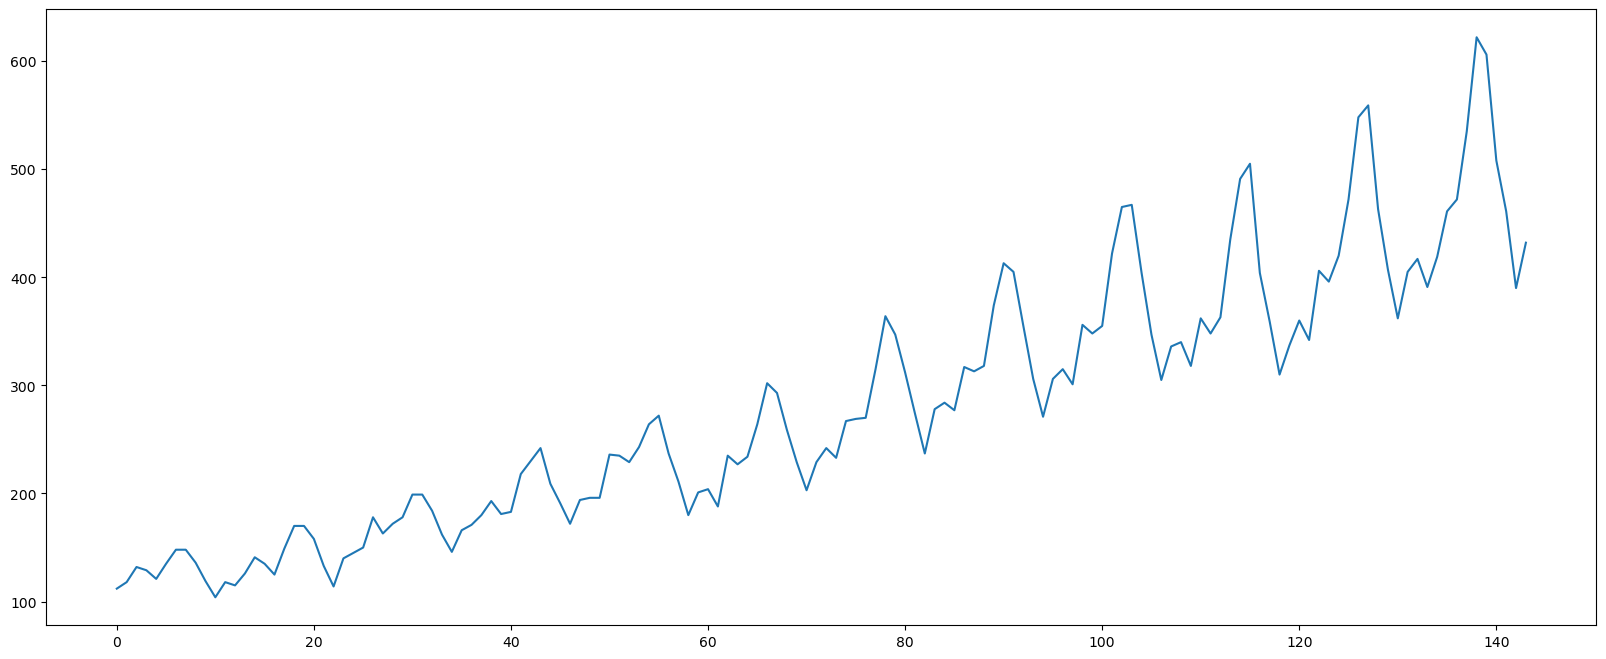

In [15]:
df['Passengers'].plot(figsize=(20,8))
# Trend in Data: Going upwards to the right
# Seasonality Component: Also amplified later in the series

In [19]:
# Square Root Transform
df['SqrtPassengers'] = np.sqrt(df['Passengers'])

<AxesSubplot:>

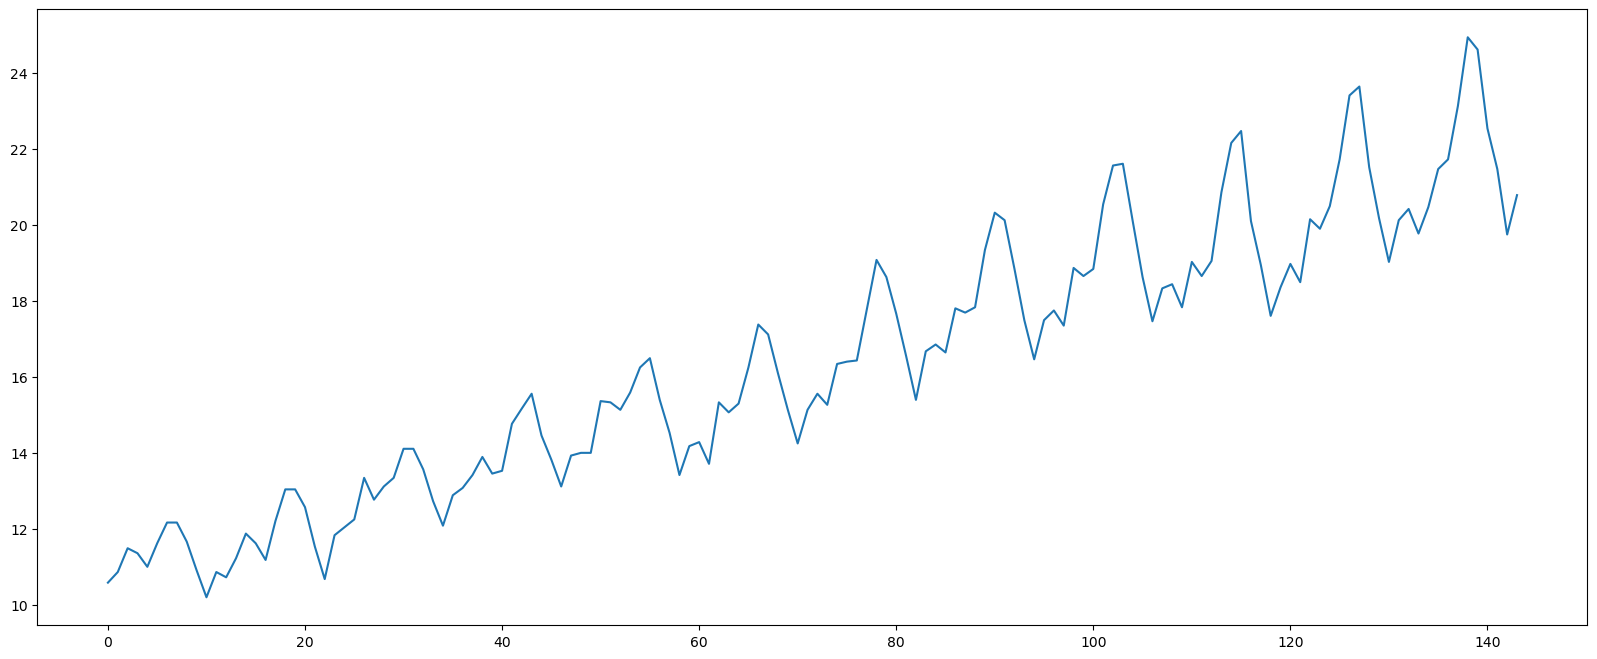

In [21]:
df['SqrtPassengers'].plot(figsize=(20,8))
# Squashes down slightly but seasonal pattern still is amplified over time

In [22]:
# Log Transform
df['LogPassengers'] = np.log(df['Passengers'])

<AxesSubplot:>

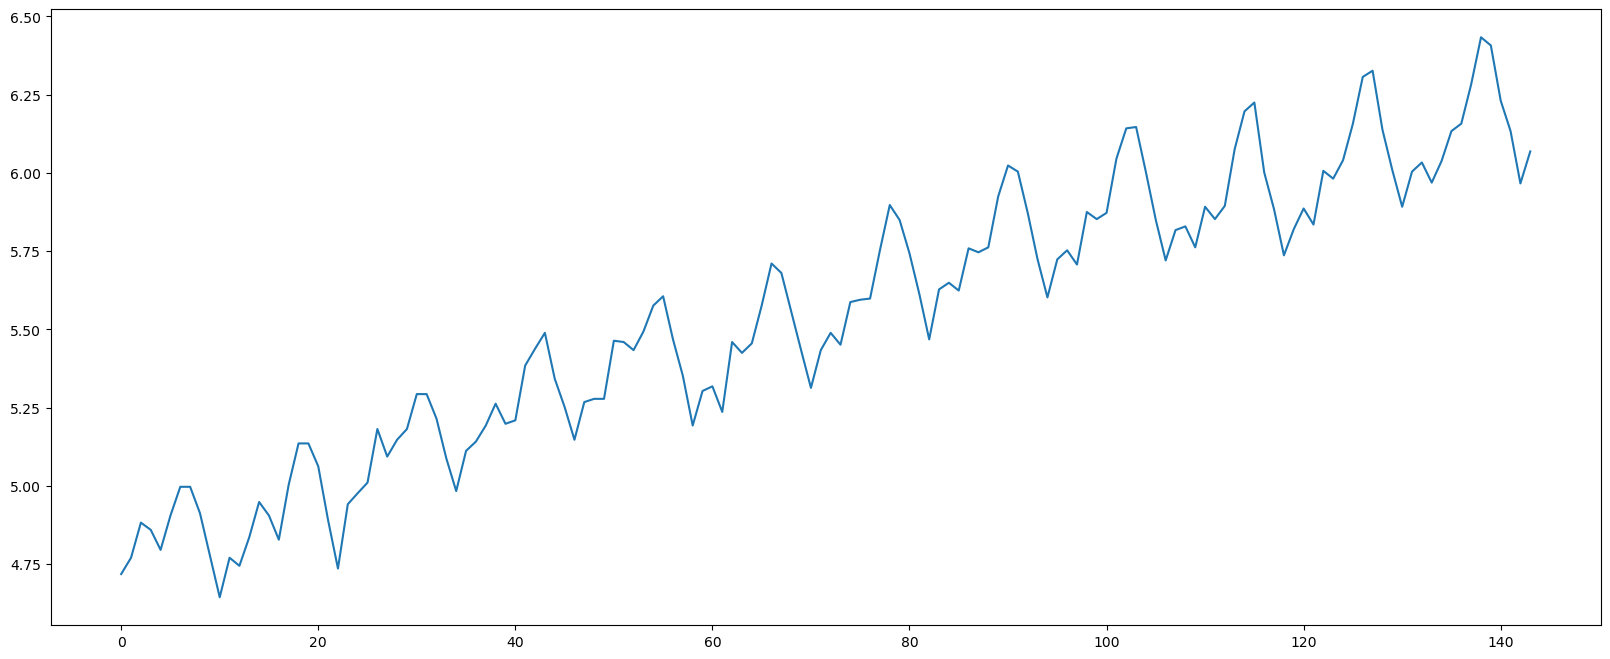

In [23]:
df['LogPassengers'].plot(figsize=(20,8))
# Squahes down data yet again, looking more uniform

In [25]:
# BoxCox takes in 1D series as input and returns optimal lambda
data, lam = boxcox(df['Passengers'])

In [26]:
lam

0.14802265137037945

<AxesSubplot:>

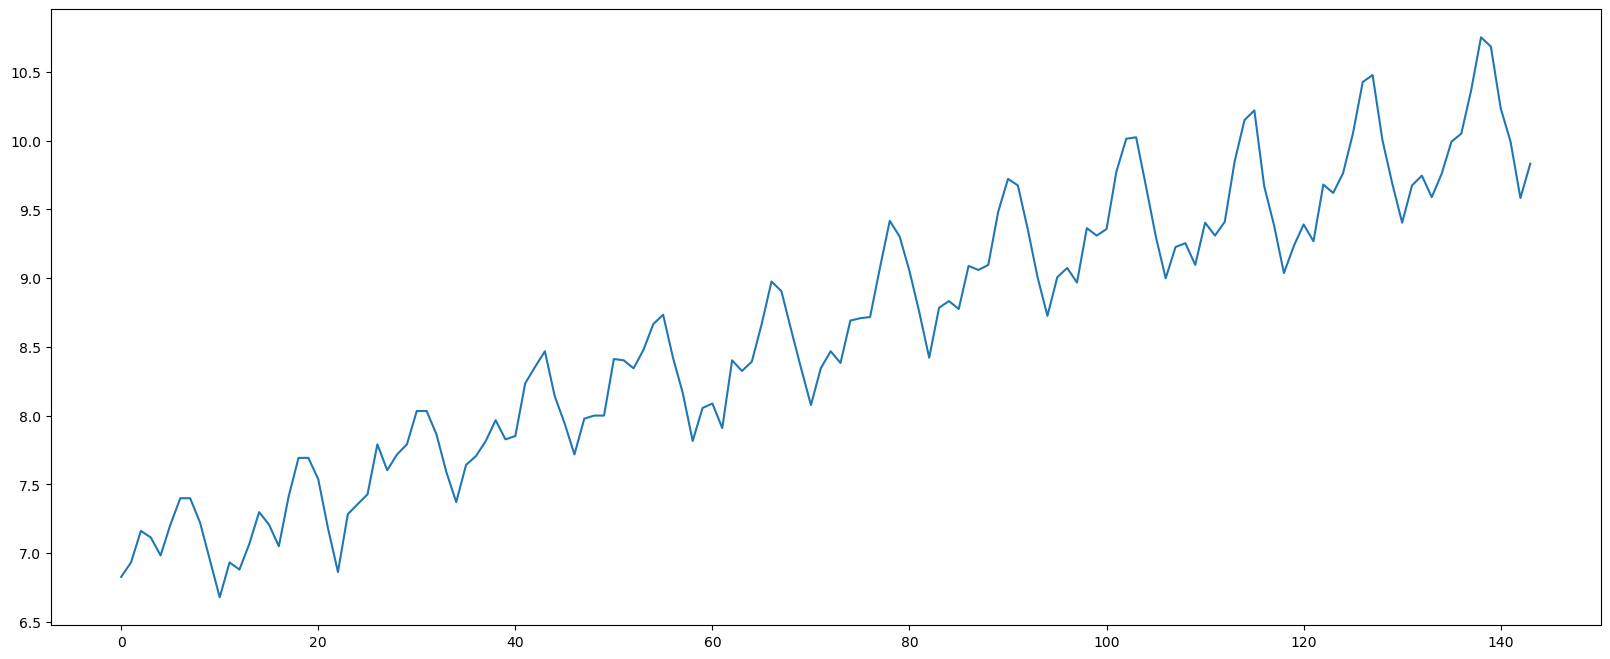

In [28]:
df['BoxCoxPassengers'] = data
df['BoxCoxPassengers'].plot(figsize=(20,8))

<AxesSubplot:>

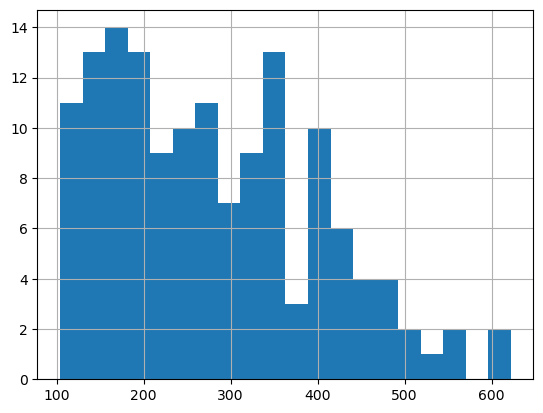

In [31]:
df['Passengers'].hist(bins=20)
# May not make sense to view, due to dynamic nature of time series

<AxesSubplot:>

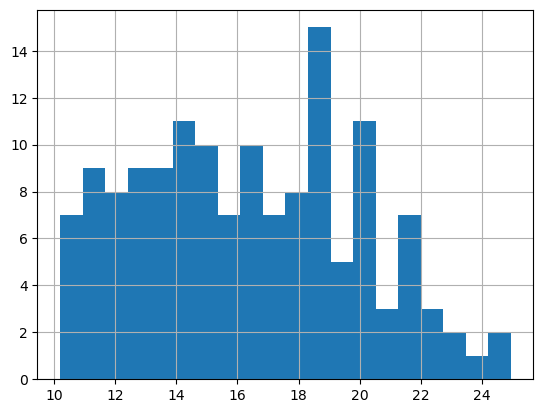

In [32]:
df['SqrtPassengers'].hist(bins=20)
# More flat and less concentrated on lower values

<AxesSubplot:>

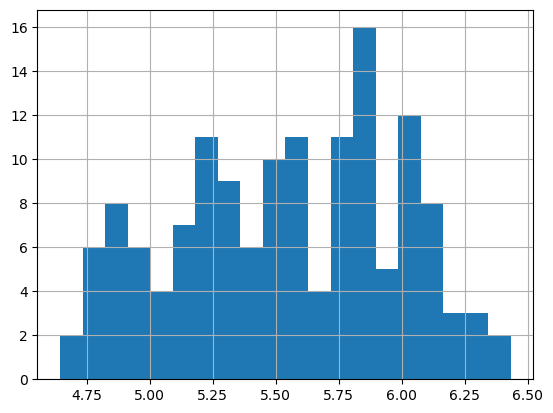

In [33]:
df['LogPassengers'].hist(bins=20)
# More evenly distributed

<AxesSubplot:>

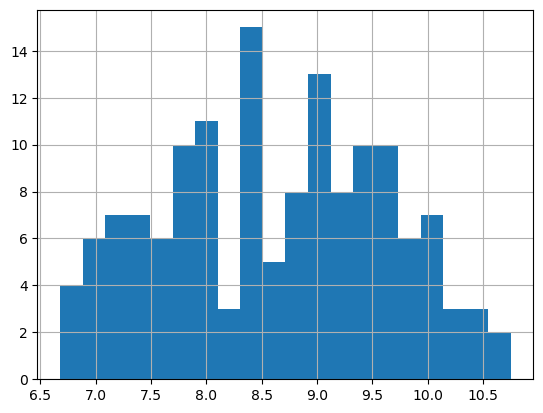

In [35]:
df['BoxCoxPassengers'].hist(bins=20)
# Same pattern except largest peak closer to the center ie. more normal

### Forecasting Metrics
* Since forecasting is essentially regression, there are similar metrics used

* Starting with the simplest: Sum of Squared Errors (SSE)
    * Difference between the yi and ŷ and square
    * Prediction may be less than target, target may be less than prediction
    * Also maximizes the Gaussian likelihood, that is when errors are normally distributed
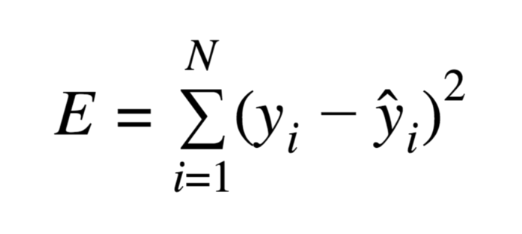

* Mean Squared Error (MSE)
    * One downside to the SSE is that it's dependant on the number of datapoints you have
    * Given N=100 and N=1000, the error will be bigger due to more predictions
    * MSE takes the SSE and divides by the number of samples N -> * 1/N
    * Also an estimate of the expected squared error
    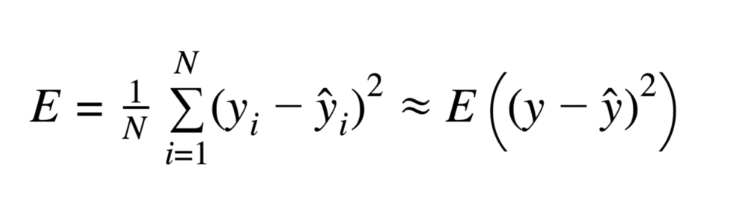

* Root Mean Squared Error (RMSE)
    * Downside to above is that they don't have intuitive units
    * Imagine temperature time series measured in Kelvin
        * What is a squared Kelvin?
    * Take sqrt of MSE, so it's on the same scale of the original data
        * Eg. House Price Prediction: Makes more sense to say RSME is £100 than MSE is 10,000 Squared Pounds
    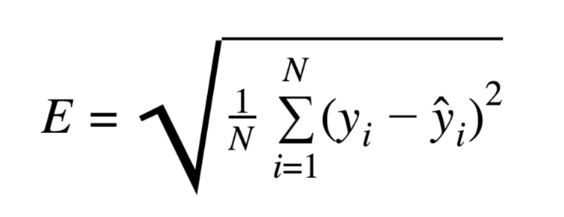

* Mean Absolute Error (MAE)
    * Why not just take the absolute value? Positive and same units as the data
    * No need to work with squared values at all
    * Take the average absolute values between target and predicted values
    * If minimizing MSE in a model, report MSE not MAE as an error metric
        * Makes more intuitive sense
        * Note some methods (e.g. ARIMA won't give a choice for minimizing)
    
   
    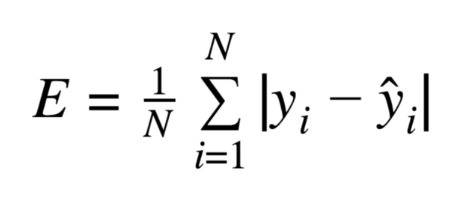

* Scale Invariance
    * MSE and MAE depend on scale of the data: e.g. House Prices (Thousands -> Millions)
    * On the other hand, stock returns are a fraction of a percent
        * Does bigger error really mean anything?
        * Unlike Classification Models where if you are correct 80% of the time, the scale dataset is irrelevant
* One Scale Invariant metric is the $ R^2 $
    * Ratio of the Sum of Squared Errors (SSE) and Total Sum of Squares  (SST) subtracted from Y
        * SST - If prediction was the mean and we took the sum of squared errors from that prediction
        * Another way to think of this is if we divide both the top/bottom by N we get the mean squared error/divided by sample variance of the target
    * If model has perfect prediction, $ MSE = 0, R^2 =1 $
    * $ R^2 =0 $ would mean the model does no better than predicting the mean ŷ 
    * Possible for $ R^2<0 $
        * SSE > SST
        * Happens when predictions are worse than just predicting ŷ 


* Scikit-Learn
    * For Classification models: model.score(X,Y) returns accuracy
    * For Regression models: model.score(X,Y) returns $R^2$

* Mean Absolute Percentage Error (MAPE)
    * Another way to get a scale-invariant error is to express it as a percentage
    * e.g. House price £1M, with prediction of +£1000, only off by 0.1%
    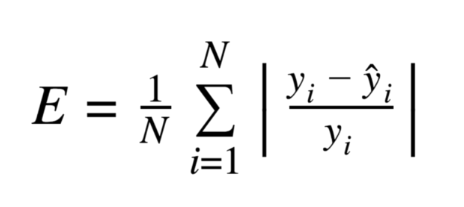

* Symmetric MAPE (sMAPE)
    * MAPE is not symmetric eg y=10, ŷ=11 vs. ŷ=10, y=11
    * Use the average of y and ŷ in denominator
    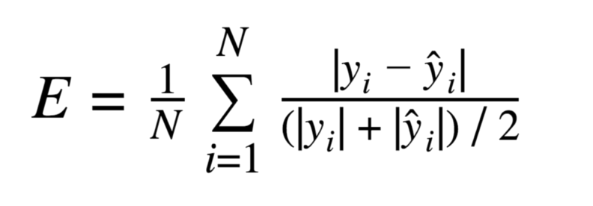

* Problem with MAPE and sMAPE
    * What happens when the denominator is zero? - Metrics explode towards infinity
    * Makes no sense as metric should only explode if prediction is wrong

* Why so many metrics?
    * Exposure to the field
    * Common theme: Many options to try and be aware of


### Financial Time Series Primer
* Big difference between treating stock prices like a regular time series
* Stock Price Time Series 
    * Continious-Values, discrete time eg Hourly
    * Interested in Stock Return and not so much Price
    * Percent Change tells us gain/loss
    * $ Rt = Pt - Pt-1/Pt-1 = Pt/Pt-1 -1$

* Contemporary Example of Importance of Returns
    * With Crypto: Bitcoin is expensive, others "Cheap"
    * Irrelevant, if return on the lower crypto is higher than BTC, or vice versa
        * All relative

* Log Price
    * Central to finance, we give it the name Log Price
    * $ Pt = logPt $

* Gross Return
    * $ 1+ Rt = Pt/Pt-1 $
    * e.g. £100 - > £120 investment yields a gross return of 1.2

* Log Return
    * Log of the Gross Return: $ log(1 + Rt) $
    * Why gross and not net returns?
        * Net can be negative
        * Corresponds to log(1+x) transformation

* Adjusted Close
    * Accounts for the close price with stock splits and dividends
    * $ 1 + Rt = Pt + Dt/Pt-1 $
    * Typically will use non-adjusted close price

### Price Simulations in Code

In [170]:
# Simulating Stock Prices assuming returns come from a normal distribution
# Applications: 
# Black Scholes forumla, Monte-Carlo Simulations, Heuristic for ARIMA

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
# number of time steps
T = 1000

# Initial Price
P0 = 10

# Drift
mu = 0.001

In [187]:
# last log price, for loop where last price will depend on last log price
last_p = np.log(P0)

# Arrays to store log returns/prices
log_returns = np.zeros(T)
prices = np.zeros(T)

for t in range(T):
    # sample a log return
    r = 0.01 * np.random.randn()
    
    # compute the new log price
    p = last_p + mu + r
    
    # store the return and price
    log_returns[t] = r + mu
    prices[t] = np.exp(p)
    
    # assign last_p
    last_p = p

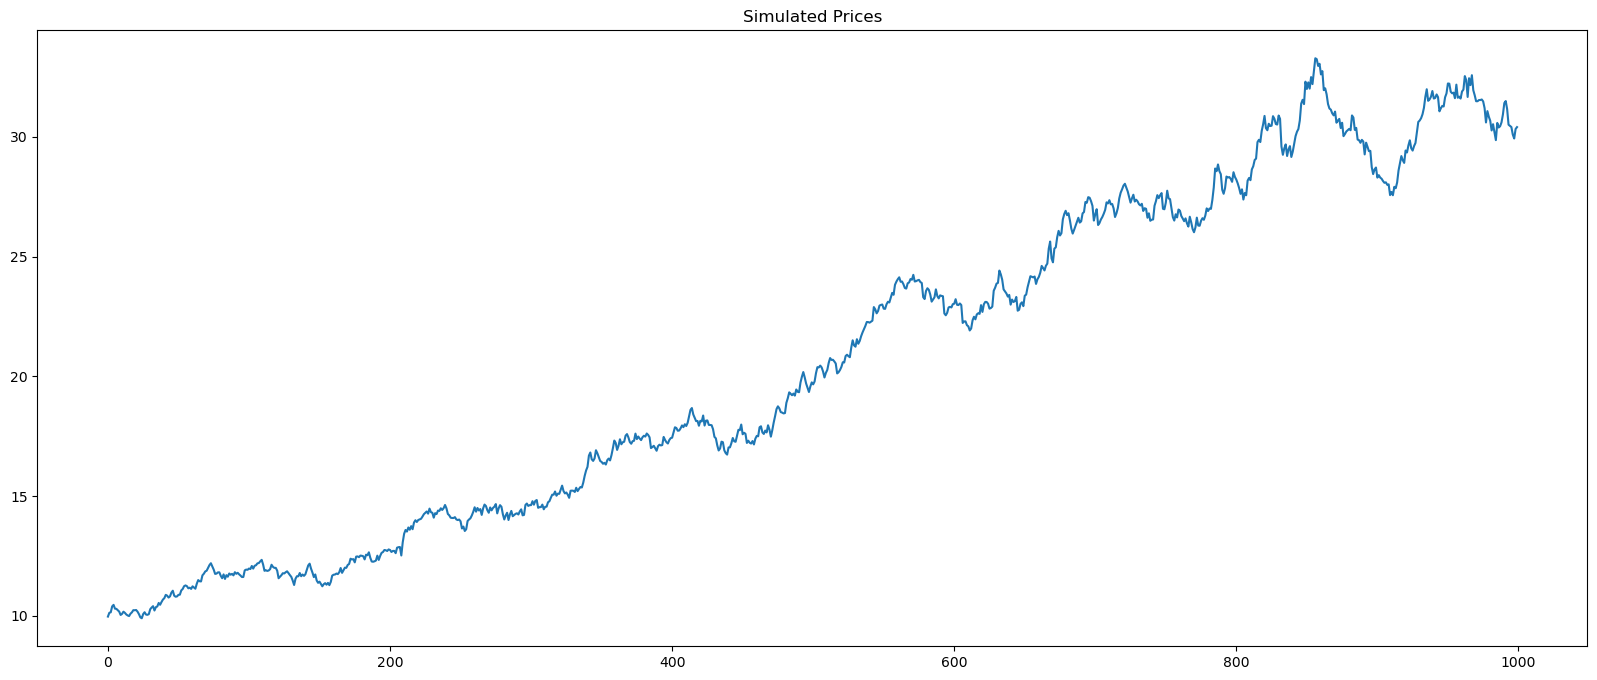

In [188]:
plt.figure(figsize=(20,8))
plt.plot(prices)
plt.title('Simulated Prices');

### Random Walks and the Random Walk Hypothesis

* More theoretical view on the price simulation practical
* Random walk is a special case of ARIMA
* Random Walk Hypothesis: Stock Prices follow a Random Walk
    * Therefore, they are unpredictable
* Mathematical concept - Special case of a Markov Process learnt in probability class
    * Specific to Finance, A Random Walk Down Wall Street that popularised EMH

* Simpliest RW:
    * $ p0  $ = some initial value 
    * $ p1 = p0 + e1, $ where $ e1 $ is {-1, +1} ...
    * e.g. taking a step to the left or right based on a coinflip
    * Hence, ability to predict result of the RW is the same as the ability to predict probability of the number of coinflips (50%)

    

* Gaussian Random Walk
    * $ p0  $ = some initial value 
    * $ p1 = p0 + e1,$ where $ei$ ~ $N(0,σ^2)$ ...

* Is the RWH Correct?
    * Assumptions: Log Returns are iid (independent and identically distributed)
        * May not be true due to volatility clustering
        * High volatility may be clustered with other volatiltiy and therefore not independent
            * Volatility clustering

* Convenient Model
    * Used to derive BScholes
    * When fitting ARIMA, sometimes best model is a RW
    * It is Possible to use stat tests to determine whether a Time Series is a RW

* Some Time Series Analysis..
* Let's begin with why the RW is a Markov Chain
    * Consider the sentence: "The quick brown fox jumps over the lazy dog"
    * How can you predict the next word?
        * "The quick brown fox jumps over the lazy ____"
    * Build a probability distribution/language model
        * $p(Wt|Wt-1, Wt-2,...,Wo)$
    * Markov Assumption:
        *  $p(Wt|Wt-1, Wt-2,...,Wo) = p(Wt|Wt-1) $
        * Example: Consider Lazy -> ____ ?
        * Predicting next word using only one word is quite difficult
        * At the same time, the Markov Assumption is very useful
    

* Take a Gaussian Random Walk 
    * $e(t)$ ~ $N(0,σ^2)$
    * hence, $x(t)$ can be represented by the mean x(t-1) and the standard deviation $σ^2$
    * forms a markov chain
    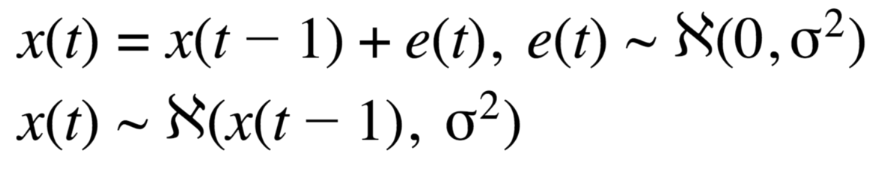
* How to forecast?
    * The expected value of a Gaussian is it's mean
    * hence, the last known value becomes the best guess
    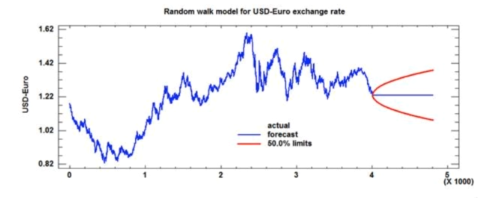
* How confident are we?
    * If we start at x(t), forecasting 𝜏 steps in the future, what is its variance?
    * Can use price simulation forumla to calculate the variance:
        * $x(t+1) = x(t) + e(t+1) $
        * $x(t+2) = x(t+1) + e(t+2) = x(t) + e(t+1) + e(t+2) $
        * .. $x(t+𝜏) = x(t) + e(t+1) + ... +e(t+𝜏) $
            * ( $x(t)$ plus a bunch of noise terms )
        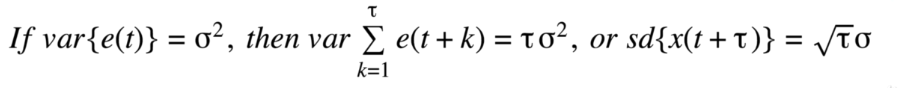
        * Variance increases linearly with number of forecasting steps
* Central Limit Theorem
    * In the long term, noise variables approach a normal distribution

### The Naive Forecast
* Scenario: You derive a ML model that produces 99% accuracy
    * What if a simple linear model provides 100%?
* Antidote to this is a baseline
    * Note: don't have to always beat the baseline
    * End up chasing numbers -> e.g. grades over learning

* The Naive Forecast
    * Simplest baseline is the naive forecast: simply copying the last known value forwards
    * Warning: bad models can make good naive forecasts
        * Forecast can look good, but may be just copying close to last previous value
* Example of bad situation:
    * Claim to beat naive forecast and have higher accuracy
    * Is it for the (train) data, or out of sample (test) data?
    * Often when you see the train accuracy rise, test accuracy gets worse
    * Why? It's overfitting to the noise in the train data

* Naive Forecast and RWs
    * If the data follows a RW, then a naive forecast is the best forecast
        * If error is zero centered with variance sigma squared

### Naive Forecast and Forecasting Metrics in Code

In [5]:
import numpy as np
import pandas as pd
import requests
from io import StringIO
import csv
import re

In [137]:
from sklearn.metrics import mean_absolute_percentage_error, \
mean_absolute_error, r2_score, mean_squared_error

In [102]:
r = requests.get('https://lazyprogrammer.me/course_files/SPY.csv').content

orig = r
# Split the long string into a list of lines
data = orig.decode('utf-8').splitlines()

# Open the file for writing
with open("SPY.csv", "w") as csv_file:
    # Create the writer object with tab delimiter
    writer = csv.writer(csv_file, delimiter = '\t')
    for line in data:
        # Writerow() needs a list of data to be written, so split at all empty spaces in the line 
        writer.writerow(re.split('\s+',line))

In [128]:
df = pd.read_csv('SPY.csv', index_col='Date', parse_dates=True)
df.head(5)

Open        High         Low       Close  Adj\tClose  \
Date                                                                     
2010-01-04  112.370003  113.389999  111.510002  113.330002   92.246048   
2010-01-05  113.260002  113.680000  112.849998  113.629997   92.490204   
2010-01-06  113.519997  113.989998  113.430000  113.709999   92.555328   
2010-01-07  113.500000  114.330002  113.180000  114.190002   92.946060   
2010-01-08  113.889999  114.620003  113.660004  114.570000   93.255348   

               Volume  
Date                   
2010-01-04  118944600  
2010-01-05  111579900  
2010-01-06  116074400  
2010-01-07  131091100  
2010-01-08  126402800

In [134]:
# Create column setting close prediction equal to the previous day
df['ClosePrediction'] = df['Close'].shift(1)
df.head(2)

Open        High         Low       Close  Adj\tClose  \
Date                                                                     
2010-01-04  112.370003  113.389999  111.510002  113.330002   92.246048   
2010-01-05  113.260002  113.680000  112.849998  113.629997   92.490204   

               Volume  ClosePrediction  
Date                                    
2010-01-04  118944600              NaN  
2010-01-05  111579900       113.330002

In [136]:
# True close prices and predicted close prices assigned to variables
# Index from iloc[1:] as first value since shifted will be NaN
y_true = df.iloc[1:]['Close']
y_pred = df.iloc[1:]['ClosePrediction']

Metrics

In [138]:
# SSE
(y_true - y_pred).dot(y_true - y_pred)

6330.374289492605

In [139]:
# MSE
mean_squared_error(y_true, y_pred)

2.798573956451196

In [140]:
# MSE Again but self implemented without library
(y_true - y_pred).dot(y_true - y_pred)/len(y_true)

2.798573956451196

In [141]:
# RMSE
mean_squared_error(y_true, y_pred, squared=False)

1.672893886787562

In [142]:
# RMSE without library
np.sqrt((y_true - y_pred).dot(y_true - y_pred)/len(y_true))

1.672893886787562

In [143]:
mean_absolute_error(y_true, y_pred)

1.1457559803120336

In [144]:
# R^2
# Gives good prediction?
# Why is it so good? Just using the previous value as a prediction
r2_score(y_true, y_pred)

0.9989603259063914

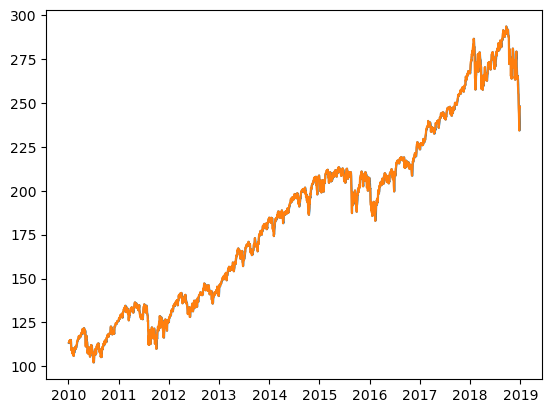

In [149]:
plt.plot(y_pred)
plt.plot(y_true)

In [145]:
# MAPE
mean_absolute_percentage_error(y_true, y_pred)

0.006494073151422373

In [146]:
# sMAPE
def smape(y_true, y_pred):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred))/2
    ratio = numerator/denominator
    return ratio.mean()
smape(y_true, y_pred)

0.006491365814068417

<h1><center>2. Exponential Smoothing and ETS Methods<h1><center>
    <a id='ESETS'></a>
    
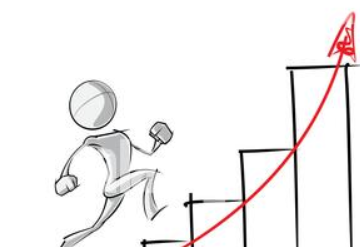

### Outline
* Basic Premise is built on a moving average 
    * Simple Moving Average (SMA)
* Exponentially Weighted Moving Average
    * Newer data points matter more than older data points
    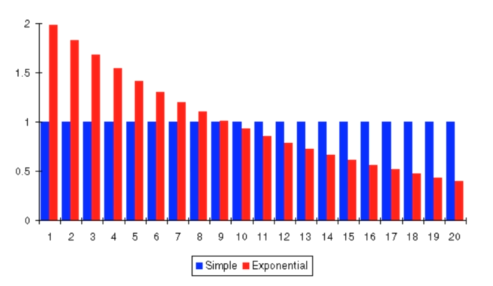

3 Forecasting Models
1. Simple Exponential Smoothing (SES)
    * Non-trending, non seasonal
2. Holt Model
    * Trending, but non-seasonal
3. Holt-Winters Model
    * Trend, seasonal

### Intuitions

* Simple Moving Average (SMA) is a simple concept
    * Take average of a rolling window, sliding across a time series
    * Each point in window matters the same amount

* Exponentially Weighted Moving Average (EWMA)
    * Using SMA, each point has weight 1/N
    * EWMA gives each point a weight that decays exponentially
    * Hence, new points matter more than older points

* Simple Exponential Smoothing (SES)
    * SES method turns EWMA into a forecasting model
    * Assumes time series fluctuates around some constant value in time
    * Learns what this average value is using the EWMA
    * Therefore forecasting beyond, assumes final EWMA value will proceed into the future
        * Makes sense in that the time series is some constant value + noise
    * In ETS terminology, this constant value is called the 'level'
    * $ Level(t+h)$ = EWMA(Time series from $1...t$)
    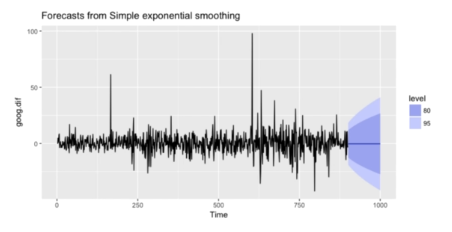

* Holts Linear Trend Model
    * Assumes there is a linear trend in time series
    * Uses two EWMA at the same time, one for the level and one for the trend
    * Forecast becomes a linear equation using this level and trend
    * Y = mx + b
        * Slope is the trend
        * X value is the steps in the forecast
        * Y intercept is the level
    * $ Level(t+h) = $ EWMA(Level of time series from $t..1$)
    * $ Trend(t+h) = $ EWMA(Trend of the time series from $1..t)$
        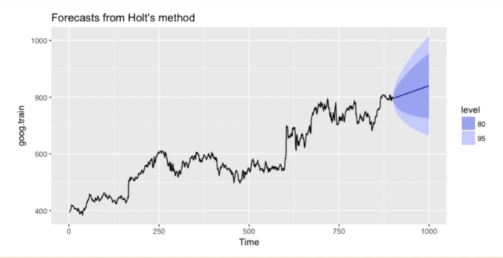
    * Line can go in any direction, now just horizontal like SES Method

* Holts-Winters Model
    * Similar to the HLTM in that it uses a EWMA to learn the level/trend
    * Additional EWMA component that captures the seasonal component of a time series
    * $ Level(t+h) = $ EWMA(Level of time series from $t..1$)
    * $ Trend(t+h) = $ EWMA(Trend of the time series from $1..t)$
    * $ Seasonal(t+h)$ = EWMA(Seasonal of time series from $1...t)$
    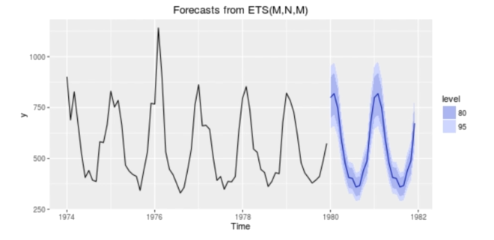
    

* Different Ways to combine
    * Output = Level + Trend + Seasonality -> Prior assumption
    * Output = Level x Trend x Seasonality
        * Note: Another motivation to take the log of a time series
        * log(Output = log(L) + log(T) + log(S)
         * Log of product = Sum of logs
    * Output = (Level + Trend) x Seasonality

### Simple Moving Average (SMA) Theory

* Start with time series, drag window along and calculate sample mean of each point in that window
* Suppose you have an array with a 3 day moving window:

In [52]:
array = np.array([2,0,8,3,6,1,1,6,5,5])
array = pd.DataFrame(array)
array['SMA'] = array.rolling(3).mean()
array.T

0    1         2         3         4         5         6         7  \
0    2.0  0.0  8.000000  3.000000  6.000000  1.000000  1.000000  6.000000   
SMA  NaN  NaN  3.333333  3.666667  5.666667  3.333333  2.666667  2.666667   

       8         9  
0    5.0  5.000000  
SMA  4.0  5.333333

* The first value of the SMA is the average of the first three values:
    * $ 2 + 0 + 8 = 3.333 $
* This then rolls on to the next three day window and so on

* Why use the SMA?
    * Suppose you need to estimate the mean/variance of stock returns
    * Returns may exhibit volatility clustering
    * 2 Options:
        1. All values to calculate mean/variance
        2. Use only recent values
        * Hence, SMA may be more useful than a overall average
    

### SMA Code

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [10]:
# Get data from site
r = requests.get('https://lazyprogrammer.me/course_files/sp500_close.csv').content

orig = r
# Split the long string into a list of lines
data = orig.decode('utf-8').splitlines()

# Open the file for writing
with open("SPYclose.csv", "w") as csv_file:
    # Create the writer object with tab delimiter
    writer = csv.writer(csv_file, delimiter = '\t')
    for line in data:
        # Writerow() needs a list of data to be written, so split at all empty spaces in the line 
        writer.writerow(re.split('\s+',line))

In [8]:
# Read to DataFrame
close = pd.read_csv('SPYclose.csv', index_col = 0, parse_dates=True)
close.head()

AAL     AAPL    AAP   ABBV    ABC    ABT    ACN   ADBE    ADI  \
2013-02-08  14.75  67.8542  78.90  36.25  46.89  34.41  73.31  39.12  45.70   
2013-02-09    NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2013-02-10    NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2013-02-11  14.46  68.5614  78.39  35.85  46.76  34.26  73.07  38.64  46.08   
2013-02-12  14.27  66.8428  78.60  35.42  46.96  34.30  73.37  38.89  46.27   

              ADM  ...   XLNX     XL    XOM   XRAY    XRX    XYL    YUM  \
2013-02-08  30.22  ...  37.51  28.24  88.61  42.87  31.84  27.09  65.30   
2013-02-09    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2013-02-10    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2013-02-11  30.28  ...  37.46  28.31  88.28  42.84  31.96  27.46  64.55   
2013-02-12  30.81  ...  37.58  28.41  88.46  42.87  31.84  27.95  64.75   

              ZBH   ZION    ZTS  
2013-02-08  75.85  24.14  33.05  
2013-02-09    NaN    NaN    NaN  
2013-02-10    NaN    NaN    NaN  
2013-02-11  75.65  24.21  33.26  
2013-02-12  75.44  24.49  33.74  

[5 rows x 505 columns]

In [9]:
# Create Google DataFrame
goog = close[['GOOG']].copy().dropna()
goog.head(3)

GOOG
2014-03-27  558.46
2014-03-28  559.99
2014-03-31  556.97

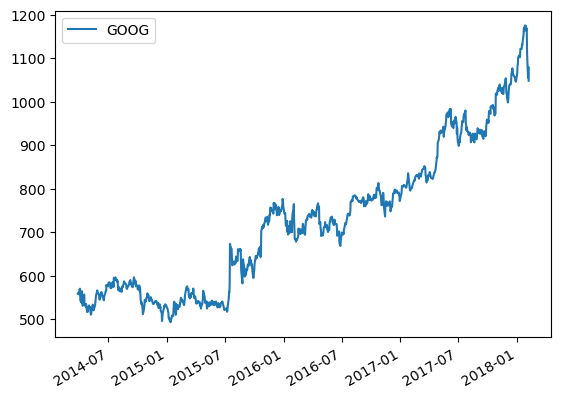

In [10]:
goog.plot();

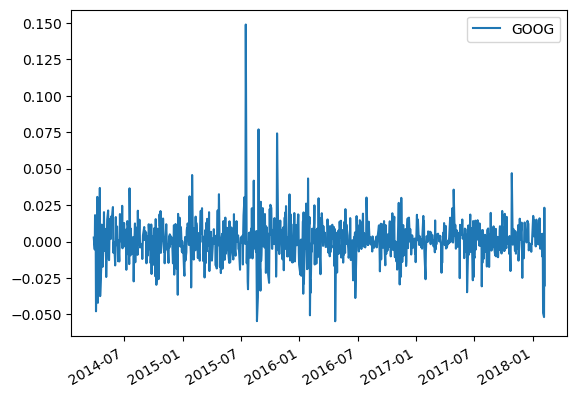

In [11]:
# Calcualte the returns of the series (pct_change + 1)
goog_ret = np.log(goog.pct_change(1)+1)
goog_ret.plot();

In [12]:
# Create rolling 10 day SMA Window
goog['SMA-10'] = goog['GOOG'].rolling(10).mean()
goog.head(15)

GOOG   SMA-10
2014-03-27  558.46      NaN
2014-03-28  559.99      NaN
2014-03-31  556.97      NaN
2014-04-01  567.16      NaN
2014-04-02  567.00      NaN
2014-04-03  569.74      NaN
2014-04-04  543.14      NaN
2014-04-07  538.15      NaN
2014-04-08  554.90      NaN
2014-04-09  564.14  557.965
2014-04-10  540.95  556.214
2014-04-11  530.60  553.275
2014-04-14  532.52  550.830
2014-04-15  536.44  547.758
2014-04-16  556.54  546.712

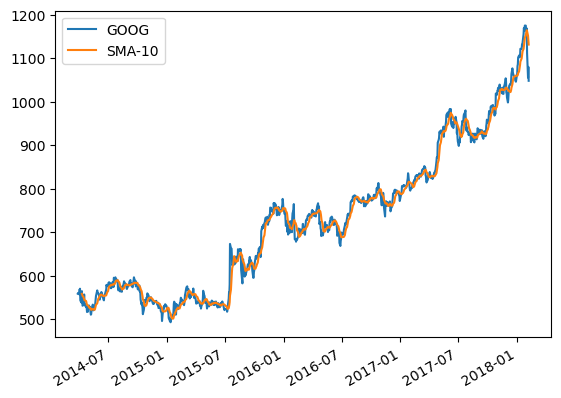

In [13]:
# Plot
goog.plot();

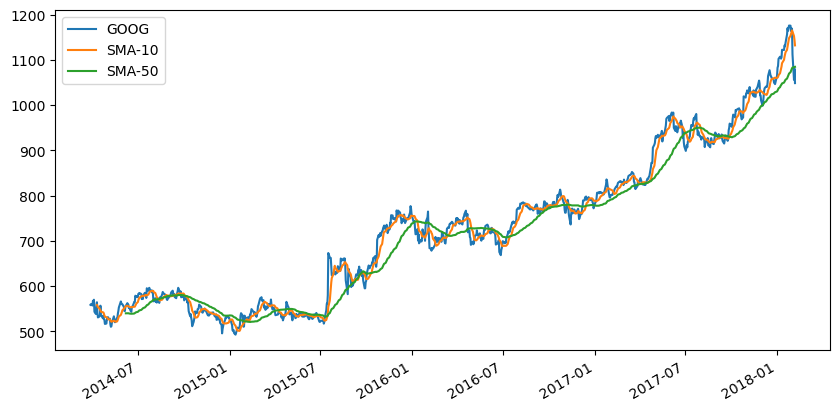

In [14]:
# Creating a 50 day rolling window
goog['SMA-50'] = goog['GOOG'].rolling(50).mean()
goog.plot(figsize=(10,5));
# Note: More smoother than SMA-10 due to more values used
#       Also appears to lag behind the original time series

In [15]:
# New DF with apple/google and calcualte covariance
# Creates a multi level index 
goog_aapl = close[['GOOG', 'AAPL']].copy().dropna()
cov = goog_aapl.rolling(50).cov()
cov

GOOG       AAPL
2014-03-27 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-28 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-31 GOOG          NaN        NaN
...                      ...        ...
2018-02-05 AAPL    34.825709  17.568865
2018-02-06 GOOG  2691.756465  38.174468
           AAPL    38.174468  19.121371
2018-02-07 GOOG  2678.778214  49.980378
           AAPL    49.980378  22.052882

[1950 rows x 2 columns]

In [16]:
# Taking a single date and converting to numpy array
cov.loc['2018-02-07'].to_numpy()

array([[2678.77821424,   49.98037849],
       [  49.98037849,   22.05288249]])

In [17]:
goog_aapl_ret = np.log(goog_aapl.pct_change(1)+1)
goog_aapl_ret.head()

GOOG      AAPL
2014-03-27       NaN       NaN
2014-03-28  0.002736 -0.001117
2014-03-31 -0.005408 -0.000223
2014-04-01  0.018130  0.009106
2014-04-02 -0.000282  0.001661

In [18]:
# Rolling 50 day window for the returns on each stock
goog_aapl_ret['GOOG-SMA-50'] = goog_aapl_ret['GOOG'].rolling(50).mean()
goog_aapl_ret['AAPL-SMA-50'] = goog_aapl_ret['AAPL'].rolling(50).mean()

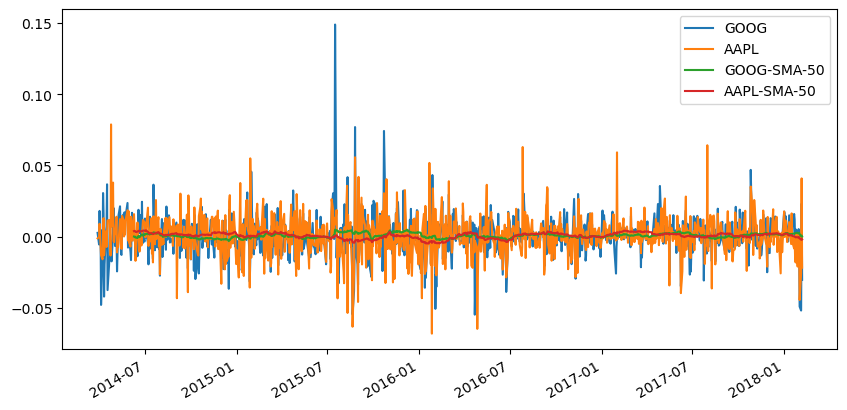

In [19]:
goog_aapl_ret.plot(figsize=(10,5));

In [20]:
cov = goog_aapl_ret[['GOOG-SMA-50', 'AAPL-SMA-50']].rolling(50).cov()
cov.tail()

GOOG-SMA-50   AAPL-SMA-50
2018-02-05 AAPL-SMA-50 -7.715772e-08  1.188405e-06
2018-02-06 GOOG-SMA-50  2.852362e-07 -1.882949e-08
           AAPL-SMA-50 -1.882949e-08  1.329746e-06
2018-02-07 GOOG-SMA-50  3.430702e-07  8.238184e-08
           AAPL-SMA-50  8.238184e-08  1.506869e-06

In [21]:
corr = goog_aapl_ret[['GOOG-SMA-50', 'AAPL-SMA-50']].rolling(50).corr()
corr.tail()

GOOG-SMA-50  AAPL-SMA-50
2018-02-05 AAPL-SMA-50    -0.138433     1.000000
2018-02-06 GOOG-SMA-50     1.000000    -0.030574
           AAPL-SMA-50    -0.030574     1.000000
2018-02-07 GOOG-SMA-50     1.000000     0.114578
           AAPL-SMA-50     0.114578     1.000000

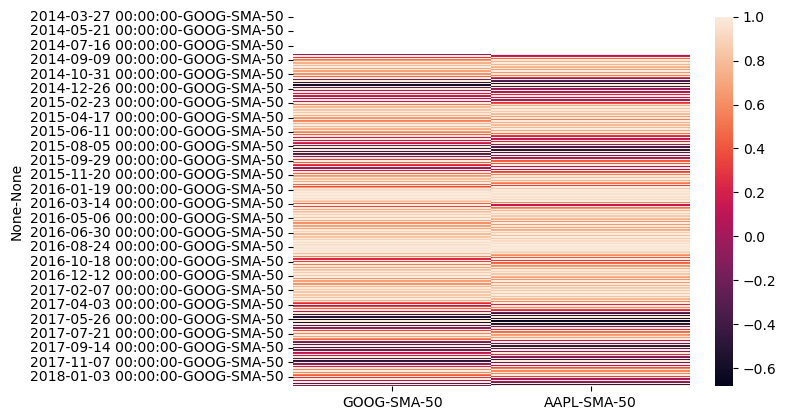

In [26]:
sns.heatmap(data = corr);

### Exponentially-Weighted Moving Average (EWMA)
* Also known as exponential smoothing or the low pass-filter
* Very applicable in ML, statistics, finance and signal processing

#### In short:
* EWMA is calculated 'on-the-fly'
    * Moving average at time t is
        * alpha * constant at xt 
        * '+ (1-alpha) at time xhat t-1
        * where alpha is between 0 and 1, or..
        $$ EWMA: x̄_t = αx_t + (1-α)x̄_{t-1}, \; {where} \; 0≤α≤1 $$ 

* Choosing Alpha
    * What value of alpha should we choose?
    * Alpha is the decay factor, typically a small value 0.1, 0.2 etc
    * Consider alpha = 1:
        *Just copy original time series
    * Consider alpha = 0
        * Just copy iteself
    * Consider alpha almost 1:
        * Follow new samples more
        * Makes the EWMA more jagged

### EWMA Code

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read in data
df = pd.read_csv('airline-passengers.csv', index_col='Month', parse_dates=True)
df.head(3)

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132

In [3]:
# Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


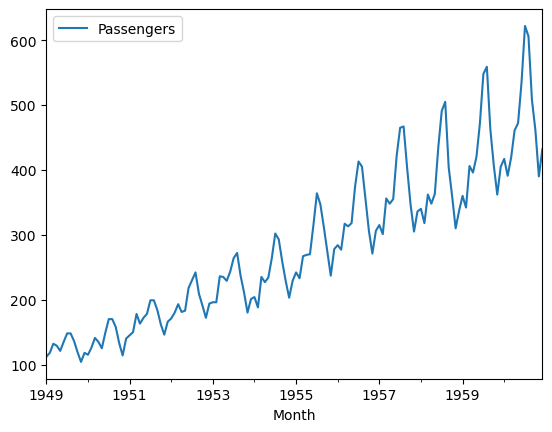

In [4]:
# Looks little like a financial time series
# Clearly is a trend component and a seasonal component that amplifies in time
# Difficult to tell if it is increasing linearly or exponentially
# Think COVID curve, would end up looking like a sigmoid curve (limited by pop)
df.plot();

In [5]:
# set alpha for EWMA, hyper parameter that you can optimize
alpha = 0.2

In [6]:
# Calling EWM on passengers column using alpha, getting the mean
df['EWMA'] = df['Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [7]:
# Returns type of EWM
type(df['Passengers'].ewm(alpha=alpha, adjust=False))

pandas.core.window.ewm.ExponentialMovingWindow

<AxesSubplot:xlabel='Month'>

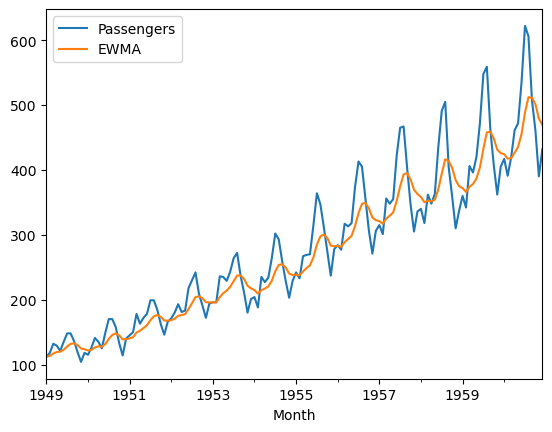

In [8]:
df.plot()

In [9]:
# Does the function do what we expect it to do?
# Check with the equation used in the theory lecture
manual_ewma = []

for x in df['Passengers'].to_numpy():
    if len(manual_ewma)>0: # check if list is empty, as EWMA based on previous v
        xhat = alpha * x + (1-alpha)*manual_ewma[-1]
    else: #
        xhat = x  # Copys first value, other optimization methods avaliable
    manual_ewma.append(xhat)
    
df['Manual'] = manual_ewma

<AxesSubplot:xlabel='Month'>

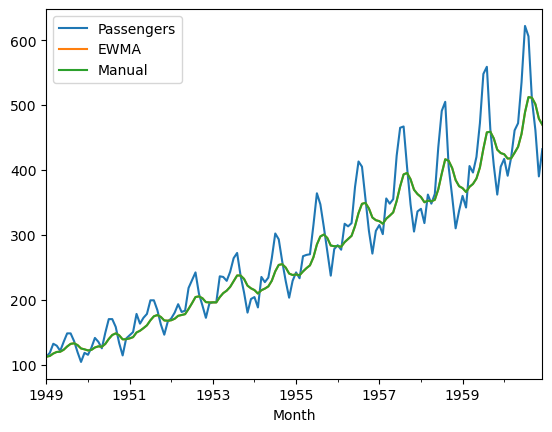

In [10]:
# Manual calculation matches the function
df.plot()

In [11]:
# Also appear to be the same from the data
df.head()

Passengers      EWMA    Manual
Month                                     
1949-01-01         112  112.0000  112.0000
1949-02-01         118  113.2000  113.2000
1949-03-01         132  116.9600  116.9600
1949-04-01         129  119.3680  119.3680
1949-05-01         121  119.6944  119.6944

In [12]:
# Remove since redundant going forward
df.drop('Manual', axis=1, inplace=True)

### Simple Exponential Smoothing (SES) Theory
* Exponential smoothing again(?)
    * Bridges the gap between exponentially smoothing and Holt-Winters
    * New perspective for exponential smoothing: time series forecassting
        * Not just different ways of taking an average in a time series
        

* Notation
    * Hats are used as they are predictions
    * $\hat{y} = \alpha y_t + (1- \alpha ) \hat{y}_{t-1} $

* The Forecasting Model
    * $\hat{y}_{t+1|t} = \alpha y_t + (1- \alpha ) \hat{y}_{t|t-1} $
    * LHS: y hat is ExpS forecast for time t+1 given (|) t
    * RHS: alpha*yt + (1+alpha) times the previous ExpS Value
* Expressing SES in Component Form
    * Useful when dealing with multiple forms
    * Forecast Equation: $\hat{y}_{t+1|t} = l_t, \; h=1,2,3...$
    * Smoothing Equation: $l_t = \alpha y_t + (1- \alpha ) l_{t-1} $
         * Forecast as h steps ahead, assigned to be $l_{t}$
         * Original time indicies also come back from EWMA Theory
    * $l_{t} $ represents the level, which can be thought of as a MA
        * Average level of signal in time, but actual signal may fluctuate around that level

* Previous have been using Pandas inbuilt functions
* Instead will be using Statsmodels

In [ ]:
# Import Model from statsmodels
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Make the model- Data is univariate (1D Array, not like Scikit)
ses = SimpleExpSmoothing

# 'fit' the model - returns a HoltWintersResult Object, check docs for function
# alpha wont be optimized in this instance; minimizes the error on training set
result = ses.fit(smoothing_level=alpha, optimized=False)

# In-sample prediction: Inside training set 
# Out of sample forecast: Outside the training set
result.predict(start=start_date, end=end_date)

# Simpler way to predict

    # Get alll in-sample predictions
    result.fittedvalues
    
    # Forecast n steps ahead
    result.forecast(n)

### SES Code

In [29]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('default')

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [30]:
# Assigning frequency to DataFrame (model dependent)
# Prior df.index freq='None', set th MS (months)
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [31]:
# Instantiate instance of class
ses = SimpleExpSmoothing(df['Passengers'])

In [32]:
res = ses.fit(smoothing_level=alpha, optimized=False)

In [36]:
# Call predicton res, starting at start date[0] index and ending at [-1]
# Create new column for this data
df['SES'] = res.predict(start=df.index[0], end=df.index[-1])

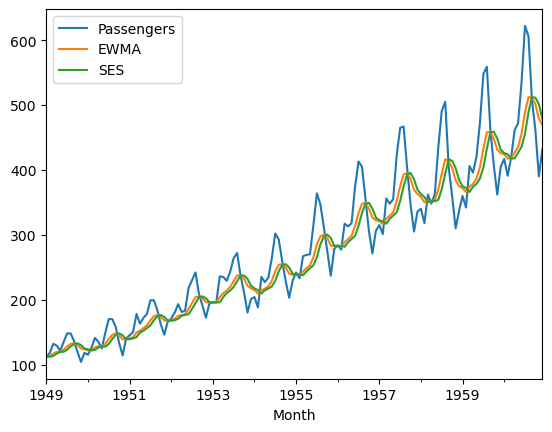

In [39]:
df.plot();
# SES model appears to be lacking behind EWMA

In [40]:
df.head()

Passengers      EWMA      SES
Month                                    
1949-01-01         112  112.0000  112.000
1949-02-01         118  113.2000  112.000
1949-03-01         132  116.9600  113.200
1949-04-01         129  119.3680  116.960
1949-05-01         121  119.6944  119.368

* Values lag behind, why?
    * Forecasting model is defined slighly differently from EWMA model:
    * Forecasting model moved up by one step, EWMA assigned the timestep prior
    * If we shift, we will have to shift everything:
        * Not required once we get to Holt-Winters Model

In [41]:
# Treat like a ML Problem and split up dataset into train and test to forecast
# Train set up to the last 12 data points
# Test set to be the last 12 datapoints onwards
N_test = 12
train = df.iloc[:-N_test]
test = df.iloc[-N_test:]

In [45]:
# Note no optimize=False, hence optimizing alpha to find best over the training set
ses = SimpleExpSmoothing(train['Passengers'], initialization_method='legacy-heuristic')
res = ses.fit()

In [46]:
# Create boolean series to index df rows 
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

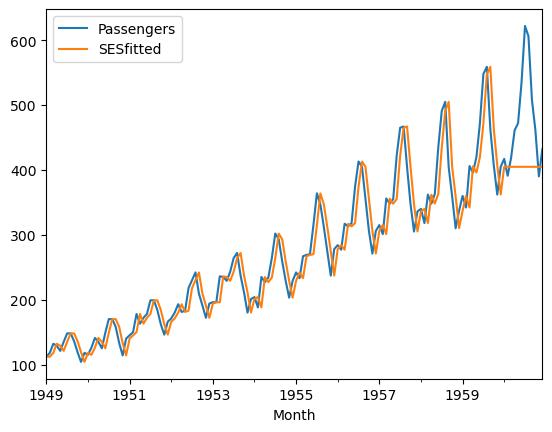

In [54]:
# Assign predictions from model to original DataFrame

# Creating column with the train data from the train_idx
# Possible to pass in boolean array into .loc function
df.loc[train_idx, 'SESfitted'] = res.fittedvalues

# Filling the test indicies in the SESfitted column with the forecast
df.loc[test_idx, 'SESfitted'] = res.forecast(N_test)

# Plotting
df[['Passengers', 'SESfitted']].plot();

In [56]:
# Looking at the plot, guess the value of alpha
# When alpha was low (0.2), model was quite smooth
# May guess that this alpha is closer to 1 than 0 as it's tracking signal from the time series fast
res.params
# alpha shown to be nearly 1, showing it copies the last known value in the series
# smoothing_level': 0.995

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

### Holt's Linear Trend Model  (HLTM) Theory
* With SES, our forecast was always a straight line
* Holt's Linear Trend Model allows for trends (lines at any angle)
* Consider what a linear trend may look like:
    * $ y = mx+b$
    * Instead suppose: $ y_t = slope \; x \; t + y_0 $
        * Same in that the slope is x, and the intercept at time $t_0$ is $y_0$

* Examining HLTM in component form:
    1. Forecast Equation: $ \hat{y}_{t+1|t} = l_t + hb_t $
    2. Level Equation: $ l_t = \alpha y_t + (1-\alpha)(l_{t-1}+b_{t-1}) $
    3. Trend Equation: $ b_t = \beta(l_t - l_{t-1})+(1-\beta)b_{t-1} $

* (1) Studying the forecast equation: $ l_t + hb_t $
    * It's just the equation for a line! 
    * Have the level which is some average $ l_t $ and the start of the forecast
    * But also something that increases linearly with the number of steps in the forecast $ hb_t $
        * (+) or (-) trend, captured by $b_t$

* (2) Studying the Level Equation: $\alpha y_t + (1-\alpha)(l_{t-1}+b_{t-1}) $
    * Very similar to level equation to before in SES
    * Difference being the $ (l_{t-1}+b_{t-1}) $ which represents the moving average value
        * Is now made up by two components, level and the trend

* (3) Studying the Trend equation: $ \beta(l_t - l_{t-1})+(1-\beta)b_{t-1} $
    * General form of this equation still follows that of Exponential Smoothing
        * $ EWMA: x̄_t = αx_t + (1-α)x̄_{t-1} $
    * In other words, $b_t$ is also an exponentially smoothed estimate
    * But of what?
        * Of whats in front of $\beta$,  $(l_t - l_{t-1})$
        * This estimates the slope of the signal
            * Value at some time $l_t$, minus value at another $l_{t-1}$, divided by difference in time 1
            * Difference is 1 here as updating $b_t$ on every time step
 

* How to treat alpha
    * Alpha is a hyperparameter, depending on what you're doing
        * Ex. Audio engineers applying effects to sound file have to tune to their tastes
    * In HLTM, can treat more like Machine Learning where we want model to be accurate with a chance of decent predictions
    * Unrequired as statsmodels computes: 
        * This works by setting up a loss function e.g. Mean Squared Error, and minimizing over the data using gradient descent
   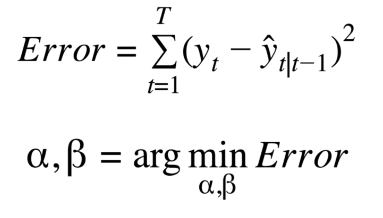
     

### HLTM Code

In [59]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import Holt

In [62]:
# Instantiate Holt Object, passing in DataFrame
holt = Holt(df['Passengers'], initialization_method='legacy-heuristic')

In [63]:
# Result object
res_h = holt.fit()

In [67]:
# Result values to column in DataFrame
df['Holt'] = res_h.fittedvalues

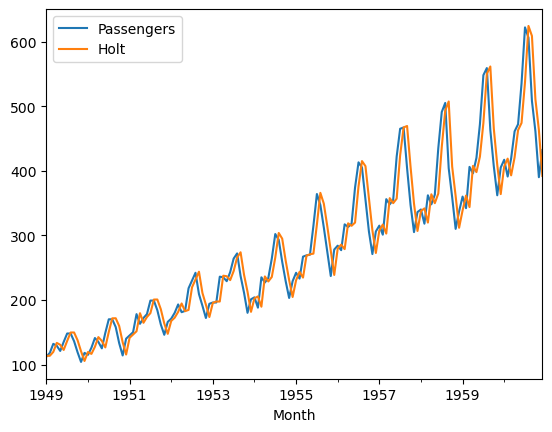

In [69]:
df[['Passengers', 'Holt']].plot();
# Note like prior, it seems to track previous value (also appears to have lag again)

In [81]:
# Use Train/Test split again to Forecast

# Splitting up data
N_test = 12
train = df.iloc[:-N_test]
test = df.iloc[-N_test:]

# Create boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

# Instantiate and fit to results object
holt = Holt(train['Passengers'], initialization_method='legacy-heuristic')
res_h = holt.fit()

# Fitted Values
df.loc[train_idx, 'Holt'] = res_h.fittedvalues

# Forecasted Values
df.loc[test_idx, 'Holt'] = res_h.forecast(N_test)

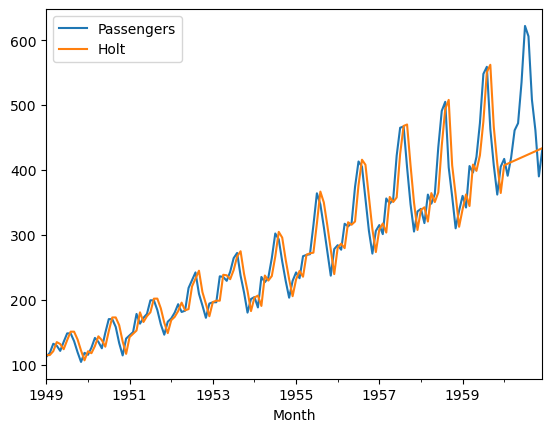

In [83]:
df[['Passengers', 'Holt']].plot();
# Notice the HLTM Captures the Linear Trend going upwards

### Holt-Winters Model  (HWM) Theory
* So far:
    * SMA
    * EWMA
    * SES as Forecasting Model
    * HLTM
* Holt-Winters adds a seasonal component 
    * Applicable everywhere: the weather, air conditioner sales, black friday etc
* Works with 3 components with two ways of combining:
    1. (Linear) trend
    2. Seasonal (cycles)
    3. Level (average)

* Additive Method vs Multiplicative Method
    * Additive: y = level + trend + seasonal
    * Multiplicative: y = (level+trend)*seasonal
        * Multiplicative makes more sense if the seasonal component seems to amplify as the level gets larger

#### Holt Winters Additive Model
   * 1. Forecast: $ \hat{y}_{t+h|t} = l_t + hb_t + s_{t+h-mk} $
   *  2. Level Equation: $ l_t = \alpha (y_t-s_{t-m}) + (1-\alpha)(l_{t-1}+b_{t-1}) $
   *  3. Trend Equation: $ b_t = \beta(l_t - l_{t-1}+(1-\beta)b_{t-1} $
   *  4. Seasonality: $s_t = \gamma (y_t - l_{t-1} - b_{t-1})+(1-\gamma)s_{t-m} $

* (1) Studying the Forecast:
    * Same components of the HLTM capturing level and the trend
    * Additional seasonal component: $ s_{t+h-mk} $
        * m = period of seasonal component (chosen manually)
        * t = last known time
        * h = steps in forecast
        * k = $ floor(\frac{h-1}{m}) +1 $
            * Intuition: Finds the latest matching seasonal component (e.g. for March Forecast, find last known March)
            * March 2020 (last-known) -> Dec 2020 -> March 2021 (Forecast)
                * AKA use seasonal component from March 2020

* (2) Studying the Level:
    * Same old exponential smoothing equation
    * Main difference is that we previous subtract seasonal component $s_{t-m}$ from $ y_t$

* (3) Studying the Trend:
    * Identical to prior 

* (4) Studying the Seasonality:
    * Again is an exponential moving average
    * After $ \gamma $ we have the new value, and after $(1-\gamma)$ the old value

#### Holt-Winters Multipicative Model
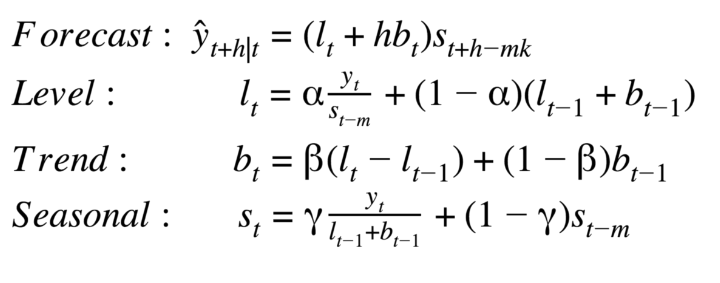
* Instead of adding, multiply

### HWM Code

In [257]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_absolute_percentage_error, \
mean_absolute_error, r2_score, mean_squared_error

from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [258]:
# Splitting up data
N_test = 12
train = df.iloc[:-N_test]
test = df.iloc[-N_test:]

# Create boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

# Instantiate and fit to results object
# Note with HWM, trend/seasonal arguemnts are passed, with m seasonal periods
hw = ExponentialSmoothing(train['Passengers'], 
                          initialization_method='legacy-heuristic',
                         trend='add',
                         seasonal='add', 
                          seasonal_periods=12)
res_hw = hw.fit()

# Fitted Values
df.loc[train_idx, 'HoltWinters'] = res_hw.fittedvalues

# Forecasted Values
df.loc[test_idx, 'HoltWinters'] = res_hw.forecast(N_test)

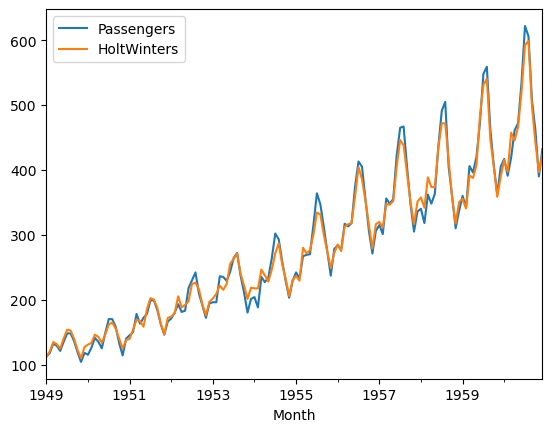

In [259]:
df[['Passengers', 'HoltWinters']].plot();
# Unlike EWMA and HLTM, model fits well for both train/test split
# Doesn't lag like previously, only lagged before due to model misspecification

In [260]:
# Now model fits well, let's try some forecasting metrics
# can alternatively can use scikit instead of stating, for example:
# mean_squared_error(train['Passengers'], res_hw.fittedvalues, squared=False)
def rmse(y, t):
    return np.sqrt(np.mean((y-t)**2))

def mae(y, t):
    return np.mean(np.abs(y-t))

In [261]:
print('Train RMSE:', rmse(train['Passengers'], res_hw.fittedvalues))
print('Test RMSE:', rmse(test['Passengers'], res_hw.forecast(N_test)))

Train RMSE: 11.624821630657795
Test RMSE: 16.980715866637066


In [262]:
print('Train MAE:', mae(train['Passengers'], res_hw.fittedvalues))
print('Test MAE:', mae(test['Passengers'], res_hw.forecast(N_test)))

Train MAE: 9.00767881470004
Test MAE: 13.38138398551437


* Note in this time series, it appears that the seasonality is amplified by the level of the time series
* As a result, a multiplicative model may fit better

In [263]:
# Instantiate Model with Multiplicative Parameter seasonal='mul'
hw = ExponentialSmoothing(train['Passengers'], 
                          initialization_method='legacy-heuristic',
                         trend='add',
                         seasonal='mul', 
                          seasonal_periods=12)
res_hw = hw.fit()

# Fitted Values
df.loc[train_idx, 'HoltWinters'] = res_hw.fittedvalues

# Forecasted Values
df.loc[test_idx, 'HoltWinters'] = res_hw.forecast(N_test)

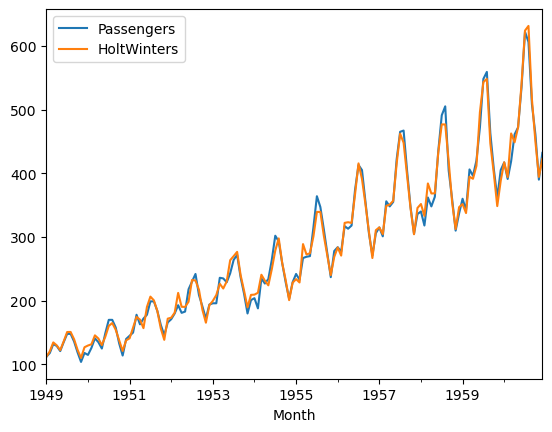

In [136]:
df[['Passengers', 'HoltWinters']].plot();

In [137]:
print('Train RMSE:', rmse(train['Passengers'], res_hw.fittedvalues))
print('Test RMSE:', rmse(test['Passengers'], res_hw.forecast(N_test)))

Train RMSE: 9.76799519556013
Test RMSE: 15.810504665577277


In [138]:
print('Train MAE:', mae(train['Passengers'], res_hw.fittedvalues))
print('Test MAE:', mae(test['Passengers'], res_hw.forecast(N_test)))

Train MAE: 7.604249558805447
Test MAE: 10.30327703954419


* Appears to fit better than additive model; both RMSE/MAE have imrpoved for train/test split

* Adding a multiplicative element to the trend may help further as the trend appears to be increasing over time

C:\Users\User\Desktop\sample_project_1\env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


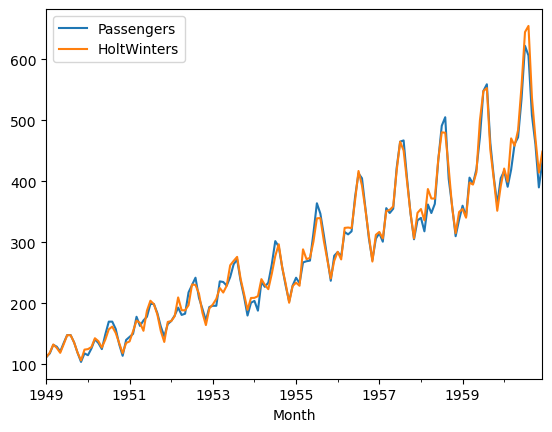

In [139]:
# Instantiate Model with Multiplicative Parameter seasonal and trend='mul'
hw = ExponentialSmoothing(train['Passengers'], 
                          initialization_method='legacy-heuristic',
                         trend='mul',
                         seasonal='mul', 
                          seasonal_periods=12)
res_hw = hw.fit()

# Fitted Values
df.loc[train_idx, 'HoltWinters'] = res_hw.fittedvalues

# Forecasted Values
df.loc[test_idx, 'HoltWinters'] = res_hw.forecast(N_test)

# Plotting
df[['Passengers', 'HoltWinters']].plot();

In [140]:
# RMSE
print('Train RMSE:', rmse(train['Passengers'], res_hw.fittedvalues))
print('Test RMSE:', rmse(test['Passengers'], res_hw.forecast(N_test)))

Train RMSE: 9.61792481784579
Test RMSE: 25.80920768734368


In [141]:
# MAE
print('Train MAE:', mae(train['Passengers'], res_hw.fittedvalues))
print('Test MAE:', mae(test['Passengers'], res_hw.forecast(N_test)))

Train MAE: 7.112425793076892
Test MAE: 20.847134506892107


* RMSE: Train error has gone down but the test error has gone up
* MAE : Likewise
* Model therefore has overfit to the training data, ending with a worse result

### Walk-Forward Validation
* Why traditional methods won't work with time series
* Let's begin with train/test split
    * In order to build model split model into train/test to avoid overfitting
    * Overfitting is when model performs well due to being overfitted to noise in training set
    * In real world, only matters to data it hasn't seen before
    * If model is too flexible, may fit well to training data but not new data


* Single Train-Test Split
    * Downside to single train-test split
        * What happens when you try to optimize your model via its configuration
        * AKA, picking the best test set for the model (Manual Parameter fitting)
        * This effectively leads to the test set becoming in-sample data

* Cross validation
    * What about using multiple validation sets?
    * Think about true test set as real future data
    * Split data into K random parts
    * Repeat this process K times: Train on K-1 parts, evaluate on the remaining parts
        * Return average score of these k iterations
        * This is called K-Folds across validation
    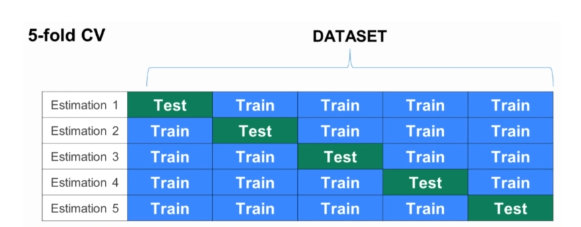
 $   \; $
* What about for time series?
    * K Folds Validation does **NOT** apply
        * Time dependence among the data points
        * Since data is split randomly, you'll mix past and future data
            * Does not reflect how model will operate in real world
            * Data must be from the past, cant train model with future data

#### Walk Forward Validation
* Realistic validation method for time series
* Start with some min data to train, and validation forecast horizon h $\ge $ 1
* Walk forward one step (train set becomes +1 bigger)
* Validate on next h data points until you reach end of data set
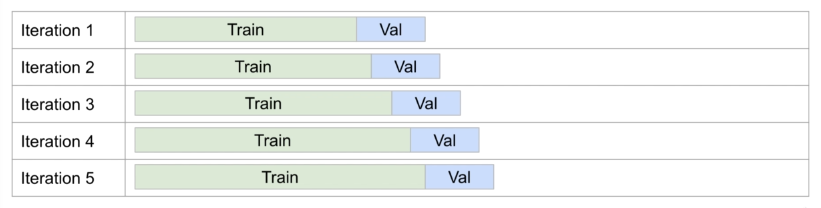

* Possible to keep train set constant to reflect newer data being more important
    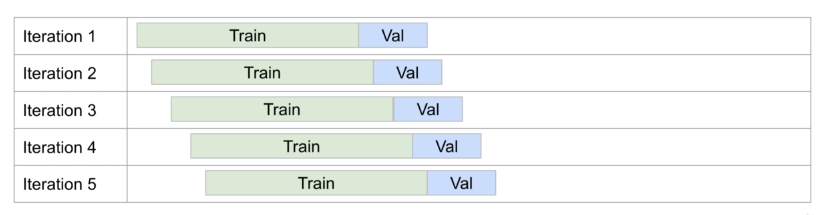

* Possible to take bigger step sizes - Walk forward h steps instead of just 1
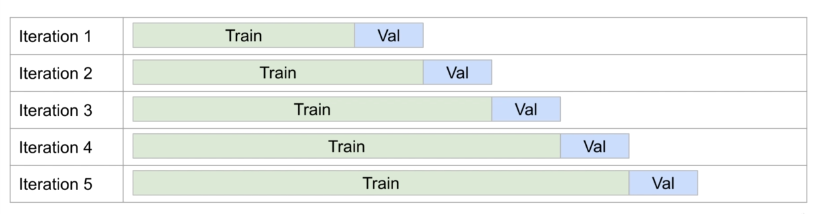
* Won't be using Walk-Forward Validation throughout notebook; Keep code concise

### Walk-Forward Validation Code

In [19]:
import numpy as np
import pandas as pd

import itertools # useful for looping different combinations

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('airline-passengers.csv', index_col ='Month', parse_dates=True)
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [5]:
df.shape

(144, 1)

In [6]:
# Assume the forecast horizon we care about is 12
# Validate over 10 steps
h = 12
steps = 10
Ntest = len(df) - h - steps + 1

In [7]:
# Confituration hyperparameters to try
trend_type_list = ['add', 'mul']
seasonal_type_list = ['add', 'mul']
damped_trend_list = [True, False]
init_method_list = ['estimated', 'heuristic', 'legacy-heuristic']
use_boxcox_list =[True, False, 0] # 'log' string argument fails

In [31]:
def walkforward(trend_type, seasonal_type, damped_trend, init_method, use_boxcox, debug=False):
    
    # store errors
    errors=[]
    seen_last=False
    steps_completed = 0

    for end_of_train in range(Ntest, len(df) - h + 1):
        # We dont have to manually 'add' the data to our dataset
        # Just index it at the right points - this is a 'view' not a 'copy'
        # So it doesn't take up any extra space or computation
        train = df.iloc[:end_of_train]
        test = df.iloc[end_of_train:end_of_train+h]

        if test.index[-1] == df.index[-1]:
            seen_last = True

        steps_completed +=1

        hw = ExponentialSmoothing(
            train['Passengers'],
            initialization_method=init_method,
            trend=trend_type,
            damped_trend=damped_trend,
            seasonal=seasonal_type,
            seasonal_periods=12,
            use_boxcox=use_boxcox)

        res_hw = hw.fit()
        
        # compute error for the forecast horizon
        fcast = res_hw.forecast(h)
        error = mean_squared_error(test['Passengers'], fcast)
        errors.append(error)
        
        if debug:
            print('seen_last:', seen_last)
            print('steps completed:', steps_completed)
            
    return np.mean(errors)

In [9]:
walkforward('add', 'add', False, 'legacy-heuristic', 0 , debug=True)

seen_last: False
steps completed: 1
seen_last: False
steps completed: 2
seen_last: False
steps completed: 3
seen_last: False
steps completed: 4
seen_last: False
steps completed: 5
seen_last: False
steps completed: 6
seen_last: False
steps completed: 7
seen_last: False
steps completed: 8
seen_last: False
steps completed: 9
seen_last: True
steps completed: 10


2521.0349551737236

In [11]:
# How do we iterate though all possible options
tuple_of_option_lists = (
    trend_type_list,
    seasonal_type_list,
    damped_trend_list,
    init_method_list,
    use_boxcox_list
)

for x in itertools.product(*tuple_of_option_lists):
    print(x)

('add', 'add', True, 'estimated', True)
('add', 'add', True, 'estimated', False)
('add', 'add', True, 'estimated', 0)
('add', 'add', True, 'heuristic', True)
('add', 'add', True, 'heuristic', False)
('add', 'add', True, 'heuristic', 0)
('add', 'add', True, 'legacy-heuristic', True)
('add', 'add', True, 'legacy-heuristic', False)
('add', 'add', True, 'legacy-heuristic', 0)
('add', 'add', False, 'estimated', True)
('add', 'add', False, 'estimated', False)
('add', 'add', False, 'estimated', 0)
('add', 'add', False, 'heuristic', True)
('add', 'add', False, 'heuristic', False)
('add', 'add', False, 'heuristic', 0)
('add', 'add', False, 'legacy-heuristic', True)
('add', 'add', False, 'legacy-heuristic', False)
('add', 'add', False, 'legacy-heuristic', 0)
('add', 'mul', True, 'estimated', True)
('add', 'mul', True, 'estimated', False)
('add', 'mul', True, 'estimated', 0)
('add', 'mul', True, 'heuristic', True)
('add', 'mul', True, 'heuristic', False)
('add', 'mul', True, 'heuristic', 0)
('add

In [30]:
best_score = float('inf')
best_options = None
for x in itertools.product(*tuple_of_option_lists):
    score = walkforward(*x)
#    print(f'Trying: {x}')
    
    if score < best_score:
        print('Best score so far:', score)
        best_score = score
        best_options = x

Best score so far: 412.8173115858077
Best score so far: 412.70676971056156
Best score so far: 320.6641388126705
Best score so far: 302.3062718377438


### Sales Data - Holt Winters Model Application 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import csv
import re

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import r2_score, mean_squared_error

C:\Users\User\Desktop\sample_project_1\env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [106]:
# Get Data 
r = requests.get('https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv').content

orig = r
# Split the long string into a list of lines
data = orig.decode('utf-8').splitlines()

# Open the file for writing
with open("perrin-freres-monthly-champagne.csv", "w") as csv_file:
    # Create the writer object with tab delimiter
    writer = csv.writer(csv_file, delimiter = '\t')
    for line in data:
        # Writerow() needs a list of data to be written, so split at all empty spaces in the line 
        writer.writerow(re.split('\s+',line))

In [16]:
# Read into DataFrame
df = pd.read_csv('perrin-freres-monthly-champagne.csv', index_col='Month', parse_dates=True)
df.head(5)

Perrin\tFreres\tmonthly\tchampagne\tsales\tmillions\t?64-?72
Month                                                                
1964-01                                             2815.0           
1964-02                                             2672.0           
1964-03                                             2755.0           
1964-04                                             2721.0           
1964-05                                             2946.0

In [17]:
# Clean up titles
df.rename(columns={'Perrin\tFreres\tmonthly\tchampagne\tsales\tmillions\t?64-?72':'Sales (£M)'}, inplace=True)

# Make sure index frequency is in months
df.index.freq = 'MS'

In [18]:
# Note 2 NAN values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 1964-01 to Perrin	Freres	monthly	champagne	sales	millions	?64-?72
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sales (£M)  105 non-null    float64
dtypes: float64(1)
memory usage: 1.7+ KB


In [19]:
# Possible to drop all values
df[df.isnull().any(axis=1)]

Sales (£M)
Month                                                         
NaN                                                        NaN
Perrin\tFreres\tmonthly\tchampagne\tsales\tmill...         NaN

In [20]:
df.dropna(inplace=True)

<AxesSubplot:xlabel='Month'>

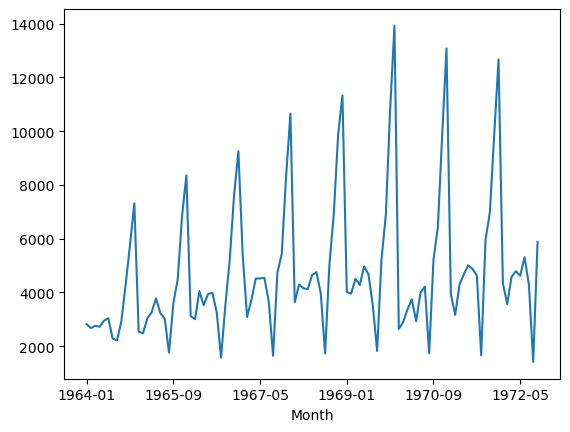

In [21]:
df['Sales (£M)'].plot()

* Series displays seasonality with slight amplication and a slight upward trend

In [34]:
# First thing to do is to split up the data into train and test splits
N_test = 12
train = df.iloc[:-N_test]
test = df.iloc[-N_test:]

In [35]:
# Create a boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [36]:
# Instantiate and fit to results object
hw = ExponentialSmoothing(train['Sales (£M)'], 
                          initialization_method='legacy-heuristic',
                         trend='add',
                         seasonal='add', 
                          seasonal_periods=12)
res_hw = hw.fit()

# Assign Fitted Values to DF
df.loc[train_idx, 'HoltWintersTrain'] = res_hw.fittedvalues

# Assign Forecasted Values to DF
df.loc[test_idx, 'HoltWintersTest'] = res_hw.forecast(N_test)

C:\Users\User\Desktop\sample_project_1\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Month'>

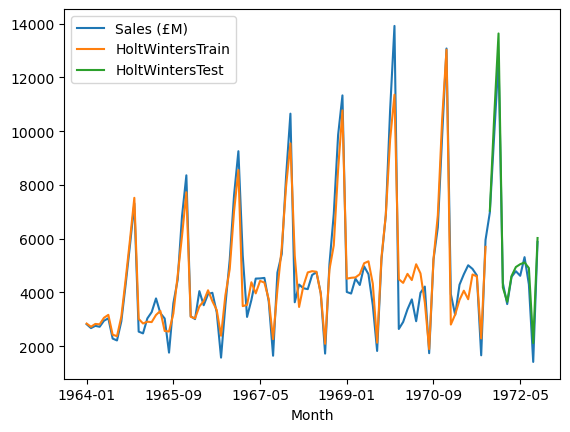

In [37]:
df.plot()

In [183]:
r2_score(train['Sales (£M)'], res_hw.fittedvalues)

0.9173444390570278

In [184]:
r2_score(test['Sales (£M)'], res_hw.forecast(N_test))

0.973589680482978

### Stock Data - Holt Winters Model Application 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import csv
import re

from sklearn.metrics import r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [5]:
# Get data
r = requests.get('https://lazyprogrammer.me/course_files/sp500sub.csv').content

orig = r
# Split the long string into a list of lines
data = orig.decode('utf-8').splitlines()

# Open the file for writing
with open("sp500sub.csv", "w") as csv_file:
    # Create the writer object with tab delimiter
    writer = csv.writer(csv_file, delimiter = '\t')
    for line in data:
        # Writerow() needs a list of data to be written, so split at all empty spaces in the line 
        writer.writerow(re.split('\s+',line))

In [141]:
df = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)
df.head()

Open   High    Low  Close  Adj\tClose     Volume  Name
Date                                                               
2010-01-04   9.22   9.51   9.17   9.50        9.50  1865400.0  INCY
2010-01-05   9.51  10.29   9.45  10.27       10.27  7608900.0  INCY
2010-01-06  10.38  11.09  10.35  11.00       11.00  8046700.0  INCY
2010-01-07  11.00  11.06  10.62  10.82       10.82  3680300.0  INCY
2010-01-08  10.82  11.00  10.75  10.94       10.94  1529300.0  INCY

In [142]:
df['Name'].value_counts()

CAH     2265
NEM     2264
SLG     2264
RSG     2264
KIM     2264
        ... 
ALLE    1287
HLT     1270
SYF     1112
SCG      871
IR       411
Name: Name, Length: 104, dtype: int64

In [143]:
# csv contains multiple company tickers, work with one
goog = df[df['Name'] =='GOOG'][['Close']].copy()

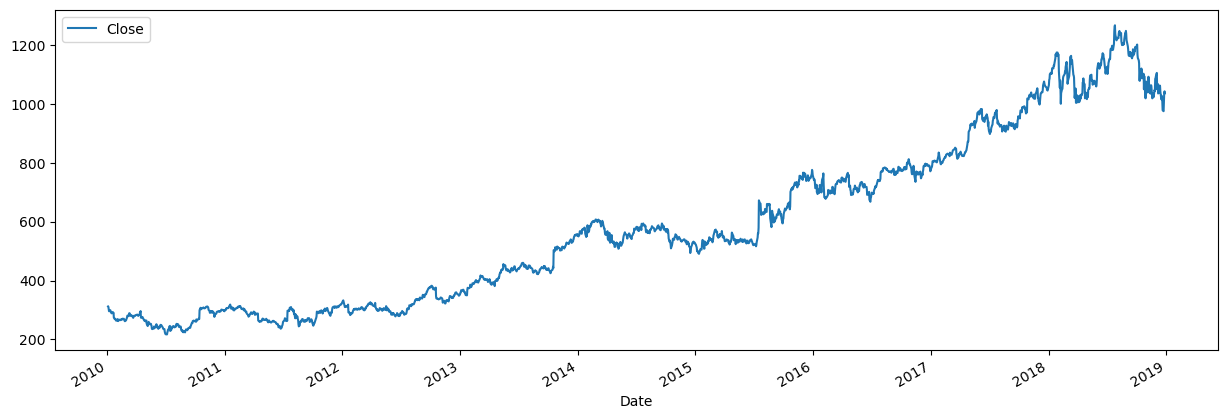

In [144]:
goog.plot(figsize=(15,5));

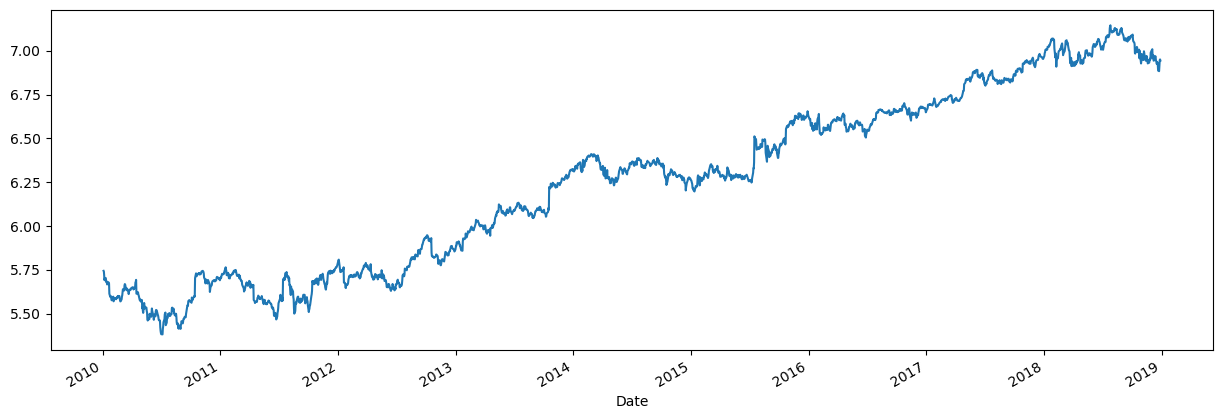

In [145]:
goog['LogPrice'] = np.log(goog['Close'])
goog['LogPrice'].plot(figsize=(15,5));

In [146]:
# First thing to do is to split up the data into train and test splits
N_test = 30
train = goog.iloc[:-N_test]
test = goog.iloc[-N_test:]
print(len(train), len(test),len(goog))

2233 30 2263


In [147]:
# Create a boolean series to index df rows
train_idx = goog.index <= train.index[-1]
test_idx = goog.index > train.index[-1]

In [148]:
# Instantiate and fit to results object
hw = ExponentialSmoothing(train['LogPrice'], 
                          initialization_method='legacy-heuristic',
                         trend='add',
                         seasonal= None, 
                          seasonal_periods=None)
res_hw = hw.fit()

# Assign Fitted Values to DF
goog.loc[train_idx, 'HoltWintersTrain'] = res_hw.fittedvalues

# Assign Forecasted Values to DF
x = goog.loc[test_idx, 'HoltWintersTest'] = res_hw.forecast(N_test).to_numpy()

# Note: to_numpy required because no index freq set due to trading days
#       sometimes not following 'B' index freq (business days)

C:\Users\User\Desktop\sample_project_1\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\Desktop\sample_project_1\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='Date'>

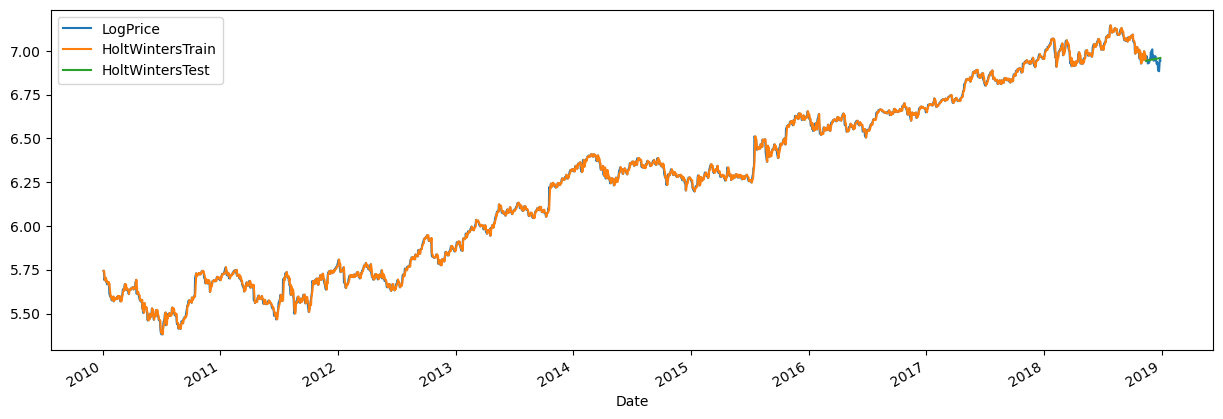

In [149]:
goog[['LogPrice', 'HoltWintersTrain', 'HoltWintersTest']].plot(figsize=(15,5))

<AxesSubplot:xlabel='Date'>

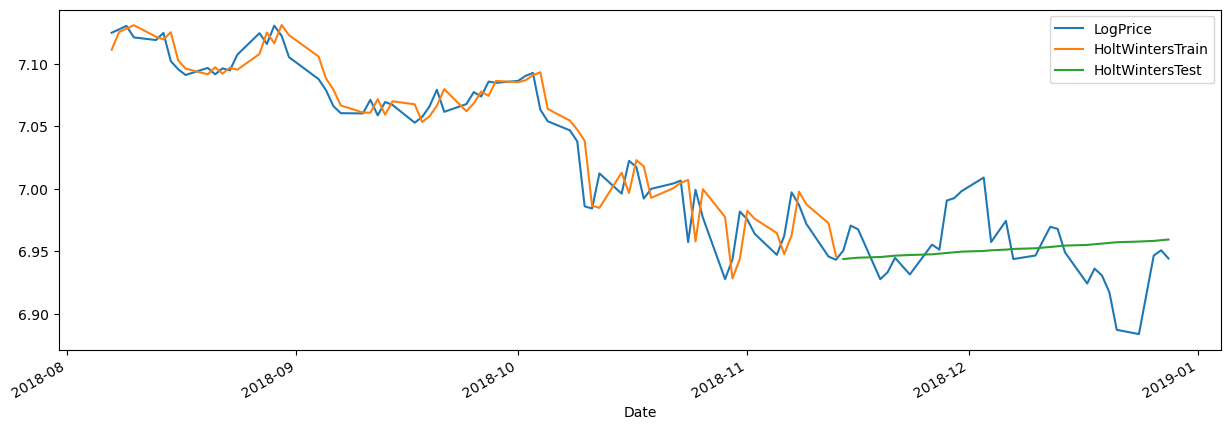

In [150]:
# To better see how our prediction is performing, plot only the last 100 points
cols = ['LogPrice', 'HoltWintersTrain', 'HoltWintersTest']
goog.iloc[-100:][cols].plot(figsize=(15,5))

* See that model appears to do well on the train set because it can copy the last value
* Note: Stock price follows a random walk
    * We've essentially modelled HLTM as there is no seasonality
    * This explains the straight line

In [151]:
r2_score(test['LogPrice'], res_hw.forecast(N_test))

C:\Users\User\Desktop\sample_project_1\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


-0.1587652489752842

In [135]:
goog.tail(100)

Close  LogPrice  HoltWintersTrain  HoltWintersTest
Date                                                                
2018-08-07  1242.219971  7.124655          7.111046         7.111141
2018-08-08  1245.609985  7.127381          7.125193         7.111773
2018-08-09  1249.099976  7.130179          7.127918         7.112405
2018-08-10  1237.609985  7.120937          7.130716         7.113037
2018-08-13  1235.010010  7.118834          7.121475         7.113669
...                 ...       ...               ...              ...
2018-12-21   979.539978  6.887083               NaN         7.171200
2018-12-24   976.219971  6.883688               NaN         7.171833
2018-12-26  1039.459961  6.946457               NaN         7.172465
2018-12-27  1043.880005  6.950700               NaN         7.173097
2018-12-28  1037.079956  6.944164               NaN         7.173729

[100 rows x 4 columns]

<h1><center>3. Autoregressive Integrated Moving Average (ARIMA) <h1><center>
    <a id='ARIMA'></a>
    
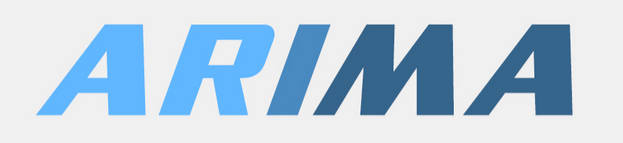

### ARIMA Introduction
* What is AR(p)?
* What is MA(q)?
* What is ARIMA(p,d,q)


* Details and Applications
    * How to choose the right ARIMA orders (p,d,q)
        * ACF and PACF help you choose p and q

* Auto ARIMA
    * ACF and PACF useful, but can use computational power to select p,d,q
    * Also exposes to other forms of ARIMA:
        * Seasonality (SARIMA)
        * Exogenous data (SARIMAX)
    * What criteria does Auto ARIMA use to define 'best'
        * In stats, common to use AIC and BIC

### Autoregressive Models (AR)

* ARIMA vs Exponential Smoothing
    * Exponential smoothing is very specific (linear trends, seasonality)
    * ARIMA models impose no such structure

* What are autoregressive models?
    * Recall simple linear regression
    * Ex. x = years experience, y = salary
    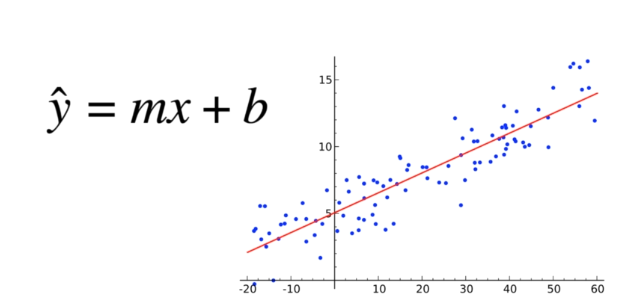
    * m and b are found by minimizing the error of the prediction

* Regression models with more than one input (Multiple Linear Regression)
    * Ex. $x_1$ = years of experience, $x_2$ = age, $ y$ = salary
    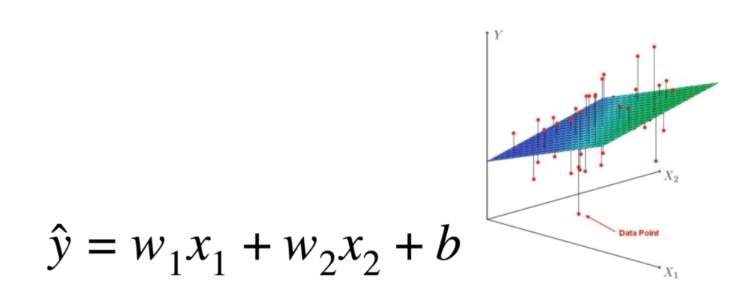
    * $w_1,w_2,b$ are found by minimizing the error of predictions
    * b = intecept
        * salary when years of experience and age are zero
    * ws = how each of the x's affect y
        * if $x_1$ increases by 1 and everything else remains constant, $\hat{y}$ salary increases by 1
        * Ex. if $w_1 = 5000 $, then on average, should expect £5000 raise every additional year
        

* AR(p)
    * What does regression have to do with time series?
    * It's just linear regression
        * use past data points in the series to predict the next point
        * AR(p) - autoregressive model of order p
        * ARIMA models help to further understand data
        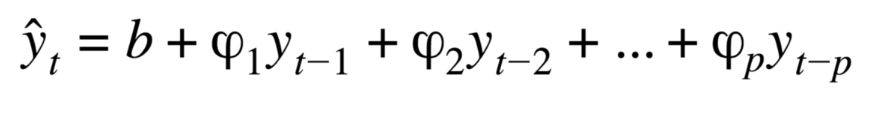

* Simulation
    * Can understand AR(p) by generating the random process
    * ie, we are given the parameters, find the time series
* Given : $y_1,y_2,y_3,\phi_1, \phi_2, \phi_3, b $ 
    * Sample $ \epsilon_4$ ~ $  N(0, \sigma^2) $
        * Calculate: $ y_4 = b + \phi_1 y_3 + \phi_2 y_2 + \phi_3 y_1 + \epsilon_4 $
    * Sample $ \epsilon_5$ ~ $  N(0, \sigma^2) $
        * ...

### Moving Average (MA)
* Not the same as SMA and EWMA

* MA(q)
    * Similar to linear regression in that it is a linear function of something
    * What of?
        * Linear function of past error terms
            * Output y depends on (q) past error terms and latest error tero $\epsilon $
        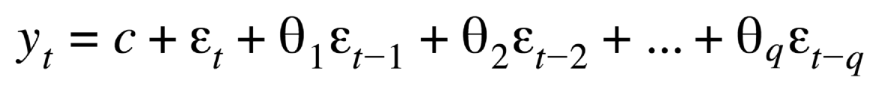

* Expected Value
    * One way to think of the model to rationalize its name
    * Given $\epsilon $ is normally distrubuted with a mean 0, the average of all errors these 0
        * This leaves us with only C
    * Can think of C as our average value with fluctuating errors $\epsilon$ that make $y_t$ go up or down
        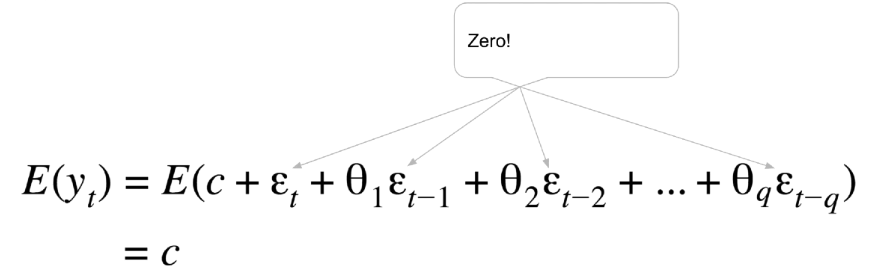
  

* Simulation MA(2) process, such that output y depends on 2 past error terms
    * Initialize: $\epsilon_1, \epsilon_2 $ ~ $N(0,\sigma^")$
    * Sample: $\epsilon_3 $ ~ $N(0,\sigma^")$
        * Calculate: $ y_3 = c + \epsilon_3 + \theta_1 \epsilon_2 + \theta_2 \epsilon_1 $
    * Sample: $\epsilon_4 $ ~ $N(0,\sigma^")$
        * Calculate: $ y_4 = c + \epsilon_4 + \theta_1 \epsilon_3 + \theta_2 \epsilon_2 $
    * ...
        * Generating samples from the normal and adding
        * Use this model if nature behaviours this way for the observed data

### ARIMA
* First will discuss ARMA
* Then, the integrated 'I' component of ARIMA

* ARMA(p,q)
    * Use this model if each point in the time series is linear correlated with past points/errors
        * Model consists of both AR and MA components
        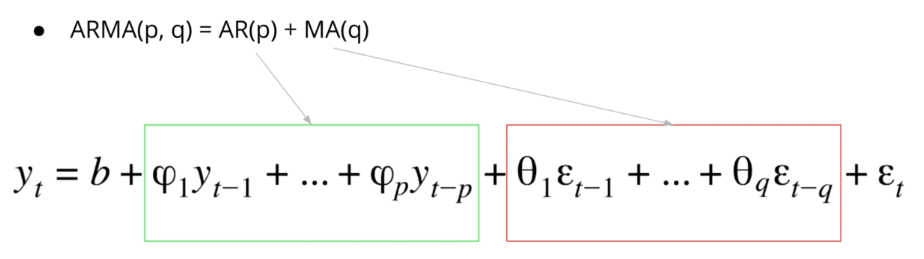

* ARIMA
    * 'I' = Integrated 
    * Differencing
        * Given: $y_t = y_1,y_2,y_T$ (some time series)
        * Differenced series: $\triangle y_t = y_t - y_{t-1} $
            * For each point in the time series, subtract the previous time point
           * Detrending to get noisy signal 
       * Why difference?
           * Want data to be close to stationary
           * Stationary = Does not change over time
               * Mean, Var, Autocorrelation will be constant over time
               * Recall: Linear models fit if there's a strong corr between inputs/outputs
           * Good when fitting a ARMA model as each window is like a training point

* What do we mean by training points
    * Want all data to come from the same distribution
        * Think Janitor Salary in Software Engineer Salaries
        * One data point will bias the result
            * Won't make much sense when trying to learn from the data
        * When a time series is stationary, this is exactly what it means

* Differencing and Stationarity 
    * Difference often makes time series stationary
    * Seen already with log returns
    * Not exact, for example volatility clustering 
    * Sometimes can need to difference twice
    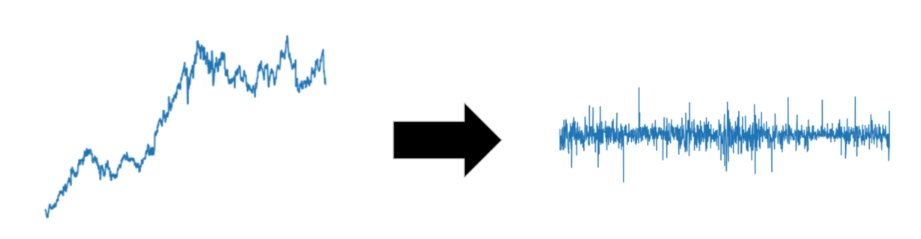

* I(d) and ARIMA(p,d,q)
    * An i(d) process is a process that is stationary after differencing d times
* Note ARIMA(0,1,0) is a random walk
    * $\triangle y_t = \epsilon_t $
    * $y_t - y_{t-1} = \epsilon_t $
    * $y_t = y_{t-1} + \epsilon_t $
    * Since log return also differences
        * If we fit ARIMA and find it to be a random walk, says returns cant be predicted from previous values

### ARIMA in code

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('airline-passengers.csv', index_col='Month', parse_dates=True)
df.head()

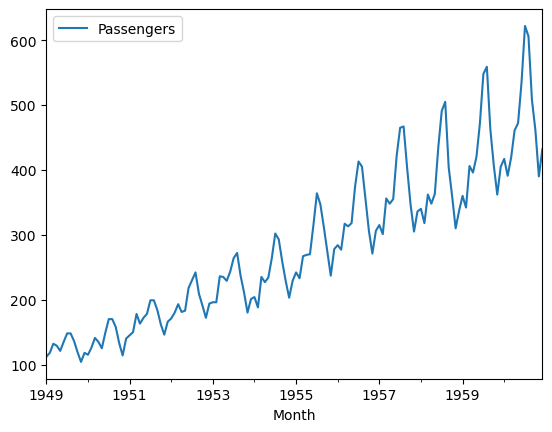

In [44]:
df.plot();

In [45]:
df['1stdiff'] = df['Passengers'].diff()

<AxesSubplot:xlabel='Month'>

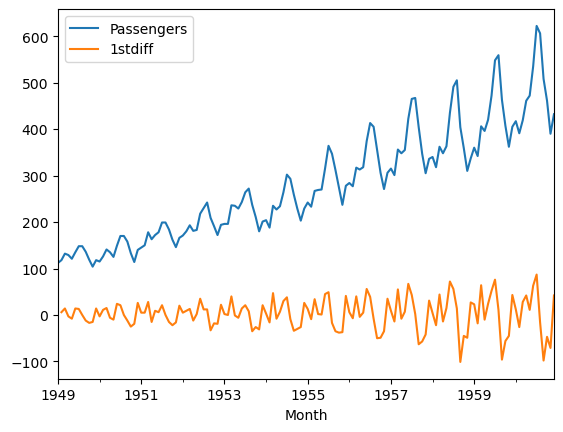

In [47]:
df.plot()
# Note not completely stationary due to seasonality over time

In [48]:
df['LogPassengers'] = np.log(df['Passengers'])

<AxesSubplot:xlabel='Month'>

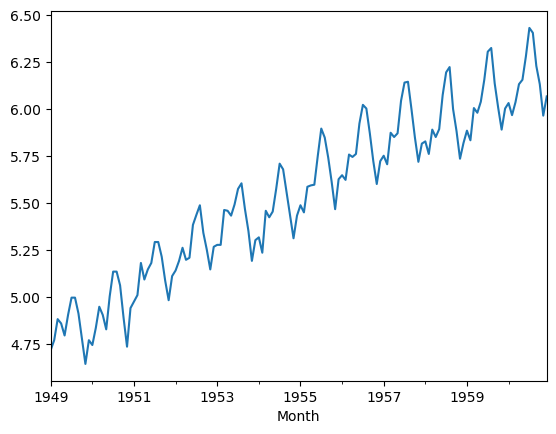

In [49]:
df['LogPassengers'].plot()

In [59]:
from statsmodels.tsa.arima.model import ARIMA

In [51]:
df.index.freq = 'MS'

In [53]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [54]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [61]:
arima = ARIMA(train['Passengers'], order=(1,0,0))

In [62]:
# returns ARIMA result object
arima_result = arima.fit()

In [63]:
df.loc[train_idx, 'AR(1)'] = arima_result.predict(
    start=train.index[0], end=train.index[-1])

<AxesSubplot:xlabel='Month'>

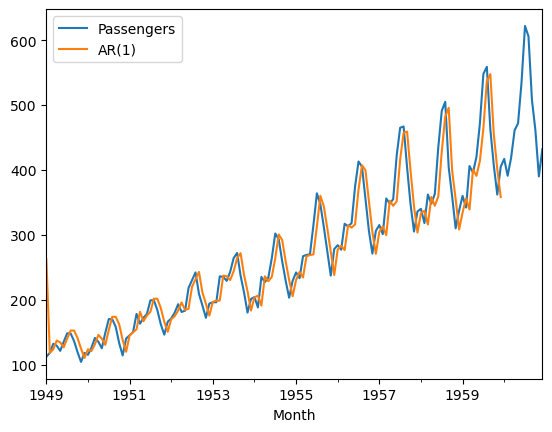

In [65]:
df[['Passengers', 'AR(1)']].plot()
# Delayed behaviour, like Holt-Winters, potentially misspecified
# Seems best model can do is copy previous value or close to it

In [68]:
prediction_result = arima_result.get_forecast(Ntest)
forecast = prediction_result.predicted_mean
df.loc[test_idx, 'AR(1)'] = forecast

<AxesSubplot:xlabel='Month'>

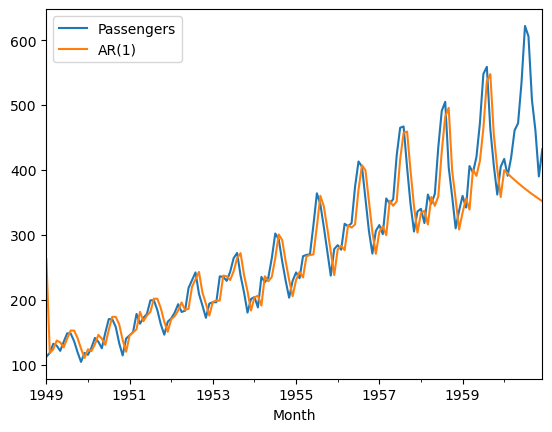

In [70]:
df[['Passengers', 'AR(1)']].plot()
# Bad forecast, even going in wrong trend direction

In [71]:
# Explore prediction results further
type(prediction_result)

statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper

In [72]:
# Confidence Interval
prediction_result.conf_int()

lower Passengers  upper Passengers
1960-01-01        338.658210        460.451500
1960-02-01        309.826171        478.809354
1960-03-01        287.732168        490.829379
1960-04-01        269.338256        499.534230
1960-05-01        253.432284        506.121347
1960-06-01        239.373402        511.217437
1960-07-01        226.768868        515.201638
1960-08-01        215.354570        518.324977
1960-09-01        204.941150        520.764224
1960-10-01        195.386337        522.649550
1960-11-01        186.579356        524.080085
1960-12-01        178.431515        525.133327

In [204]:
def plot_fit_and_forecast(result):
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(df['Passengers'], label='data')
    
    # Plot the curve fitted on the train set
    train_pred = result.fittedvalues
    ax.plot(train.index, train_pred, color='green', label='fitted')
    
    # forecast the test set
    prediction_result = result.get_forecast(Ntest)
    conf_int = prediction_result.conf_int()
    lower, upper = conf_int['lower Passengers'], conf_int['upper Passengers']
    forecast = prediction_result.predicted_mean
    ax.plot(test.index, forecast, label='forecast')
    ax.fill_between(test.index, lower, upper, color='red', alpha=0.3)
    ax.legend()

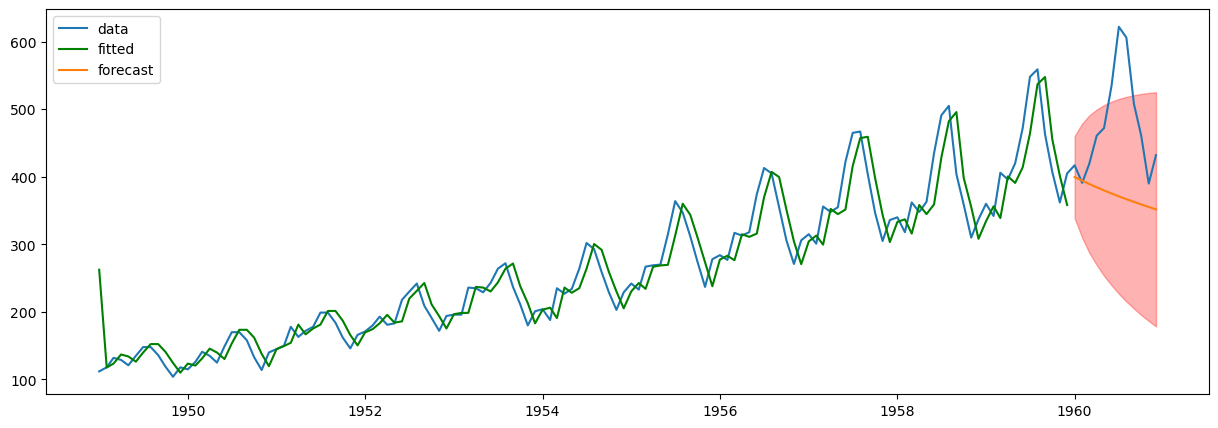

In [78]:
plot_fit_and_forecast(arima_result)

C:\Users\User\Desktop\sample_project_1\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\Desktop\sample_project_1\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


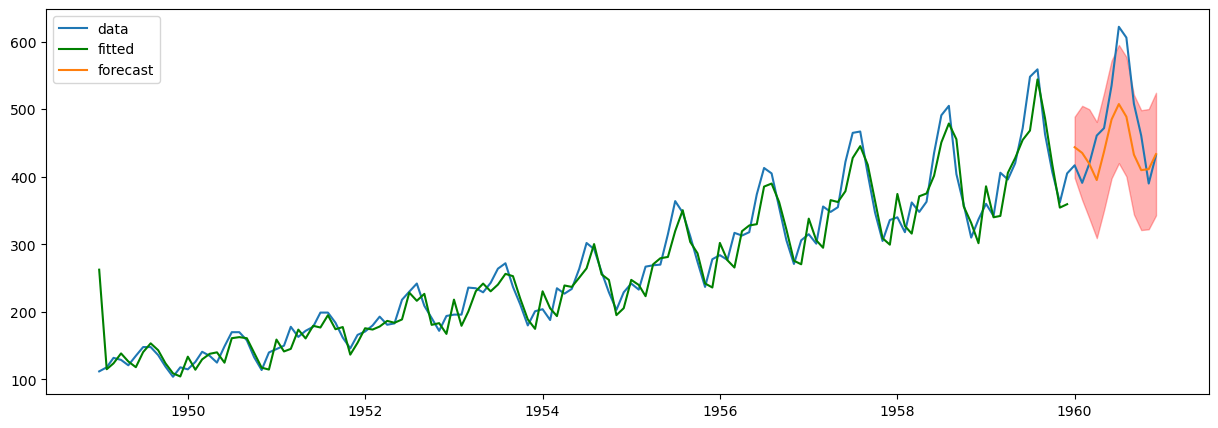

In [79]:
arima = ARIMA(train['Passengers'], order=(10,0,0)) # AR(10)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

C:\Users\User\Desktop\sample_project_1\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


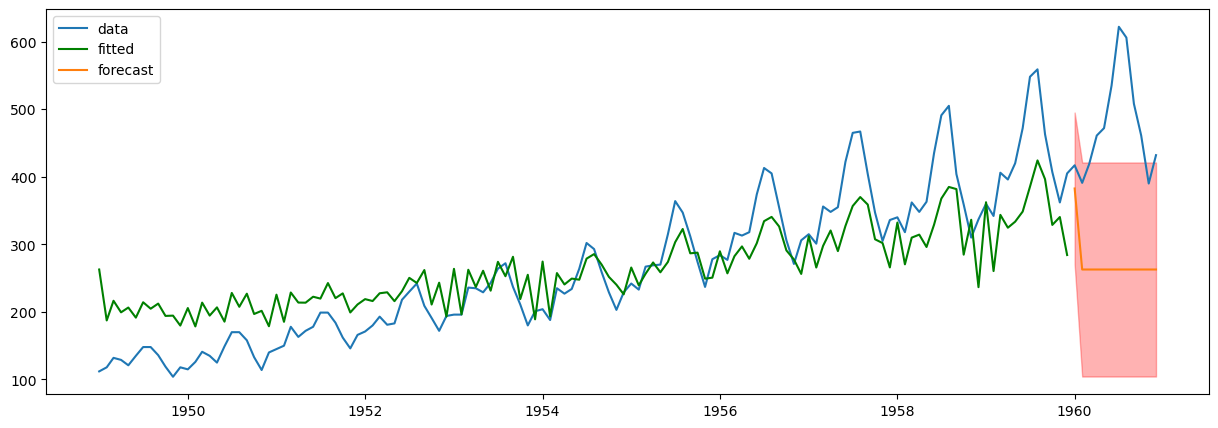

In [81]:
arima = ARIMA(train['Passengers'], order=(0,0,1)) # MA(1)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)
# As from before, forecast of MA is always a constant value as takes value C

In [102]:
df['Log1stDiff'] = df['LogPassengers'].diff()

<AxesSubplot:xlabel='Month'>

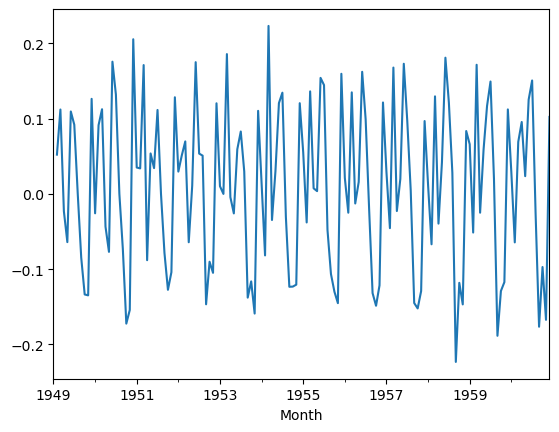

In [103]:
df['Log1stDiff'].plot()
# Unlike 1st difference, these don't seem to grow so much over time

In [209]:
# New function required, differencing removing first row, value doesnt exist
def plot_fit_and_forecast_int(result, d, col='Passengers'):
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(df[col], label='data')
    
    # Plot the curve fitted on the train set
    train_pred = result.predict(start=train.index[d], end=train.index[-1])
    
    ax.plot(train.index[d:], train_pred, color='green', label='fitted')
    
    # forecast the test set
    prediction_result = result.get_forecast(Ntest)
    conf_int = prediction_result.conf_int()
    lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
    forecast = prediction_result.predicted_mean
    ax.plot(test.index, forecast, label='forecast')
    ax.fill_between(test.index, lower, upper, color='red', alpha=0.3)
    ax.legend()

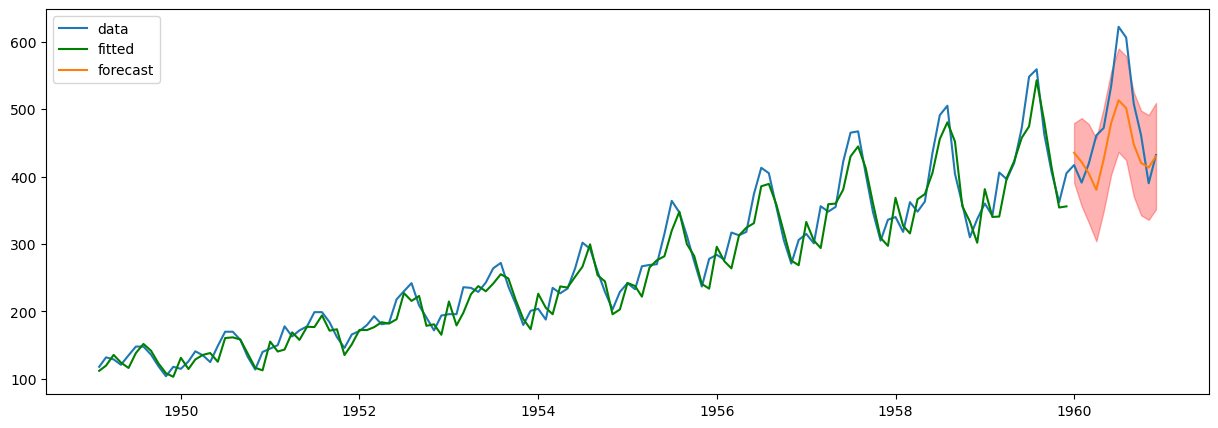

In [210]:
arima = ARIMA(train['Passengers'], order=(8,1,1))
arima_result_811 = arima.fit()
plot_fit_and_forecast_int(arima_result_811, d=1)
###### ISSUE WITH INDEX, FITTING NAN POINT

In [215]:
arima_result_811.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  132
Model:                 ARIMA(8, 1, 1)   Log Likelihood                -595.573
Date:                Thu, 15 Jun 2023   AIC                           1211.146
Time:                        11:27:40   BIC                           1239.898
Sample:                    01-01-1949   HQIC                          1222.829
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5350      0.222      2.409      0.016       0.100       0.970
ar.L2         -0.4001      0.153     -2.613      0.009      -0.700      -0.100
ar.L3         -0.0175      0.143     -0.123      0.902      -0.298       0.263
ar.L4         -0.4143      0.091     -4.534      0.000      -0.593      -0.235
ar.L5          0.1470      0.138      1.063      0.288      -0.124       0.418
ar.L6         -0.3154      0.113     -2.788      0.005      -0.537      -0.094
ar.L7          0.0872      0.129      0.677      0.499      -0.165       0.340
ar.L8         -0.4988      0.138     -3.606      0.000      -0.770      -0.228
ma.L1         -0.4409      0.253     -1.743      0.081      -0.937       0.055
sigma2       504.1688     62.704      8.040      0.000     381.271     627.067
===================================================================================
Ljung-Box (L1) (Q):                   3.44   Jarque-Bera (JB):                 9.42
Prob(Q):                              0.06   Prob(JB):                         0.01
Heteroskedasticity (H):               4.88   Skew:                             0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""